# 搭建N$\times$P$\times$1的BP神经网络预测乳房癌肿瘤是否为恶性

In [1]:
# load modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline

np.random.seed(1)

# 加载和处理breast_cancer数据集

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()
print('KEYS:',breast_cancer.keys())
print('X的维度为:',breast_cancer.get('data').shape)
print('Y的维度为:',breast_cancer.get('target').shape)
print('X的属性名称:',breast_cancer.get('feature_names'))
print('Y的属性名称:',breast_cancer.get('target_names'))

KEYS: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
X的维度为: (569, 30)
Y的维度为: (569,)
X的属性名称: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Y的属性名称: ['malignant' 'benign']


## 数据集的属性

- 特征名称(X的属性）：

'平均半径','平均纹理','平均周长','平均面积','平均平滑度','平均紧密度','平均凹度','平均凹点','平均对称','平均分形维数','半径错误','纹理错误','周长错误','面积错误','平滑度误差','紧密度误差','凹度误差','凹点误差','对称误差','分形维数误差','最糟糕的半径','最糟糕的纹理','最糟糕的周长','最糟糕的区域','最糟糕的平滑性','最糟糕的紧致性','最糟糕的凹性','最差凹点','最差的对称性','最差分形维数'
- Y: 0 -- “恶性” 1--“良性”

In [3]:
zh_ch_feature = ['平均半径','平均纹理','平均周长','平均面积','平均平滑度','平均紧致度','平均凹度','平均凹点','平均对称',
                 '平均分形维数','半径误差','纹理误差','周长误差','面积误差','平滑度误差','紧致度误差','凹度误差','凹点误差','对称误差',
                 '分形维数误差','最糟糕的半径','最糟糕的纹理','最糟糕的周长','最糟糕的区域','最糟糕的平滑度','最糟糕的紧致度',
                 '最糟糕的凹度','最差凹点','最差的对称性','最差分形维数']

## 加载X, Y

In [4]:
X = breast_cancer.get('data')
Y = breast_cancer.get('target')

通过Dataframe查看数据

In [5]:
features = list(breast_cancer.get('feature_names'))

X_ = pd.DataFrame(X, columns=zh_ch_feature)

X_.head(5)

平均半径   平均纹理    平均周长    平均面积    平均平滑度    平均紧致度    平均凹度     平均凹点    平均对称  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

    平均分形维数  ...  最糟糕的半径  最糟糕的纹理  最糟糕的周长  最糟糕的区域  最糟糕的平滑度  最糟糕的紧致度  最糟糕的凹度  \
0  0.07871  ...   25.38   17.33  184.60  2019.0   0.1622   0.6656  0.7119   
1  0.05667  ...   24.99   23.41  158.80  1956.0   0.1238   0.1866  0.2416   
2  0.05999  ...   23.57   25.53  152.50  1709.0   0.1444   0.4245  0.4504   
3  0.09744  ...   14.91   26.50   98.87   567.7   0.2098   0.8663  0.6869   
4  0.05883  ...   22.54   16.67  152.20  1575.0   0.1374   0.2050  0.4000   

     最差凹点  最差的对称性   最差分形维数  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 30 columns]

## 分析数据

### 查看数据相关性

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
pca.fit(X)
newX=pca.fit_transform(X) 

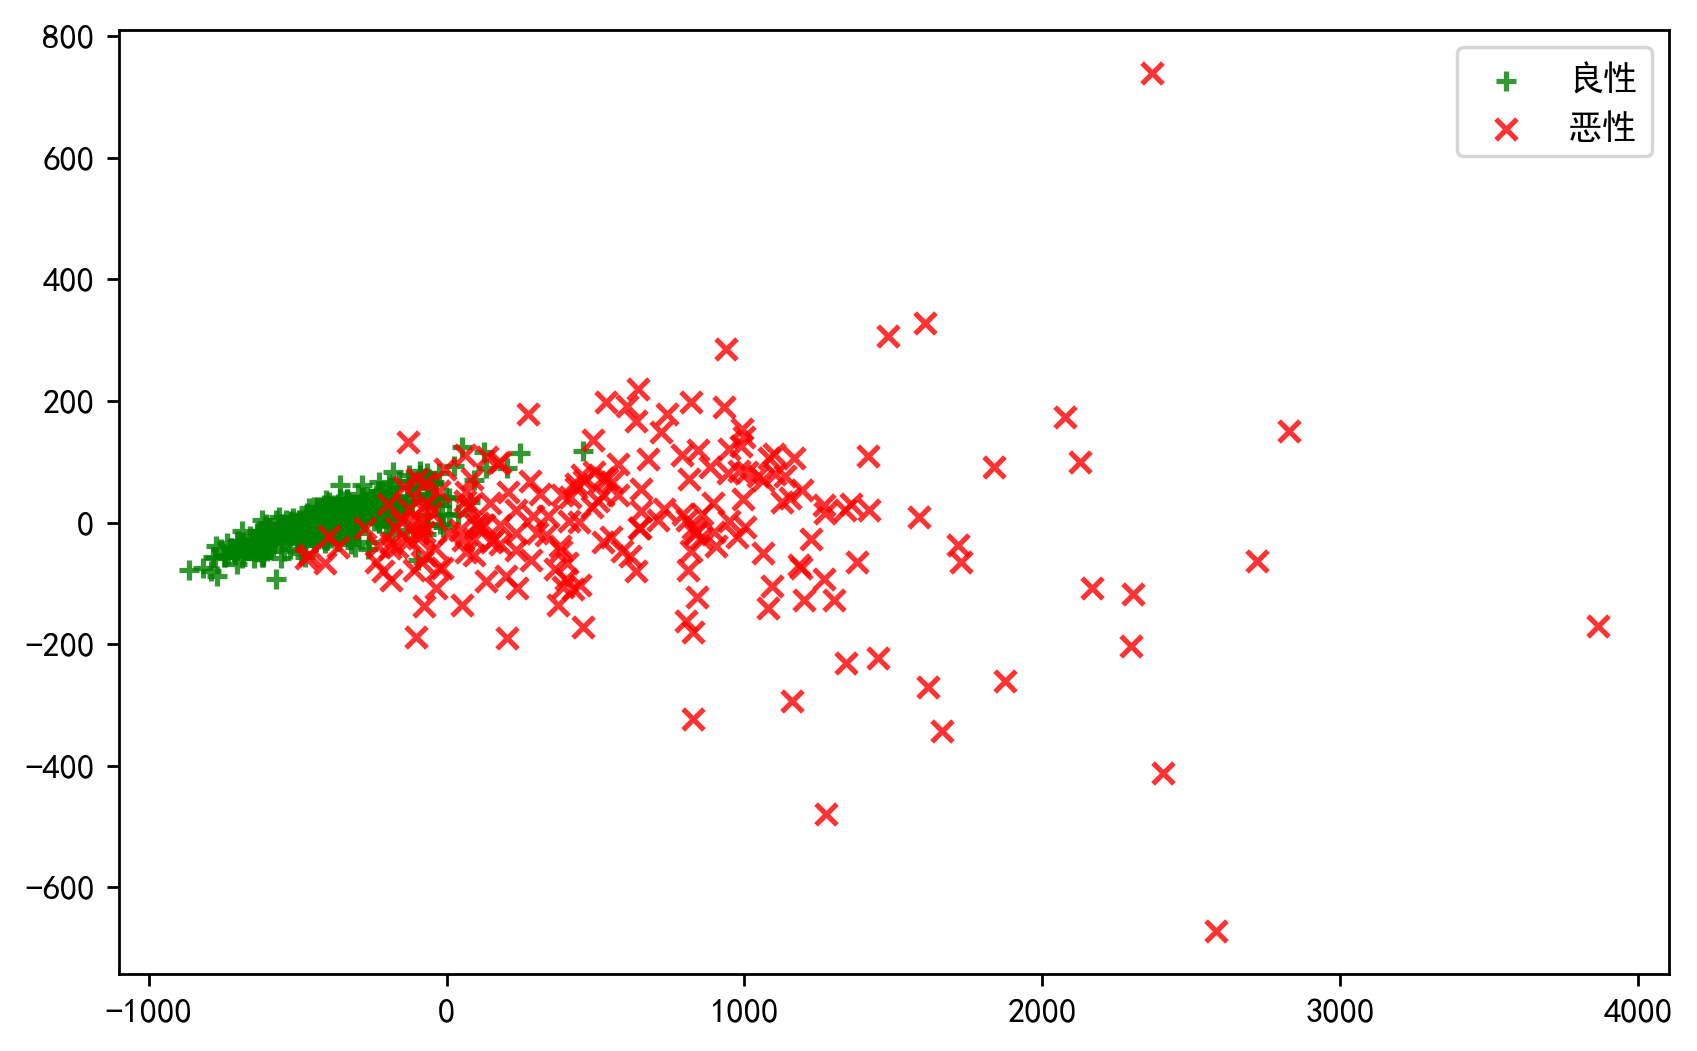

In [8]:
plt.figure(figsize=(8, 5),dpi=250)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.scatter(newX[Y==1,0],newX[Y==1,1],c='g',alpha=0.8,marker='+',label='良性')
plt.scatter(newX[Y==0,0],newX[Y==0,1],c='r',alpha=0.8,marker='x',label='恶性')
plt.legend(loc='upper right')
# plt.savefig('PCA.pdf')

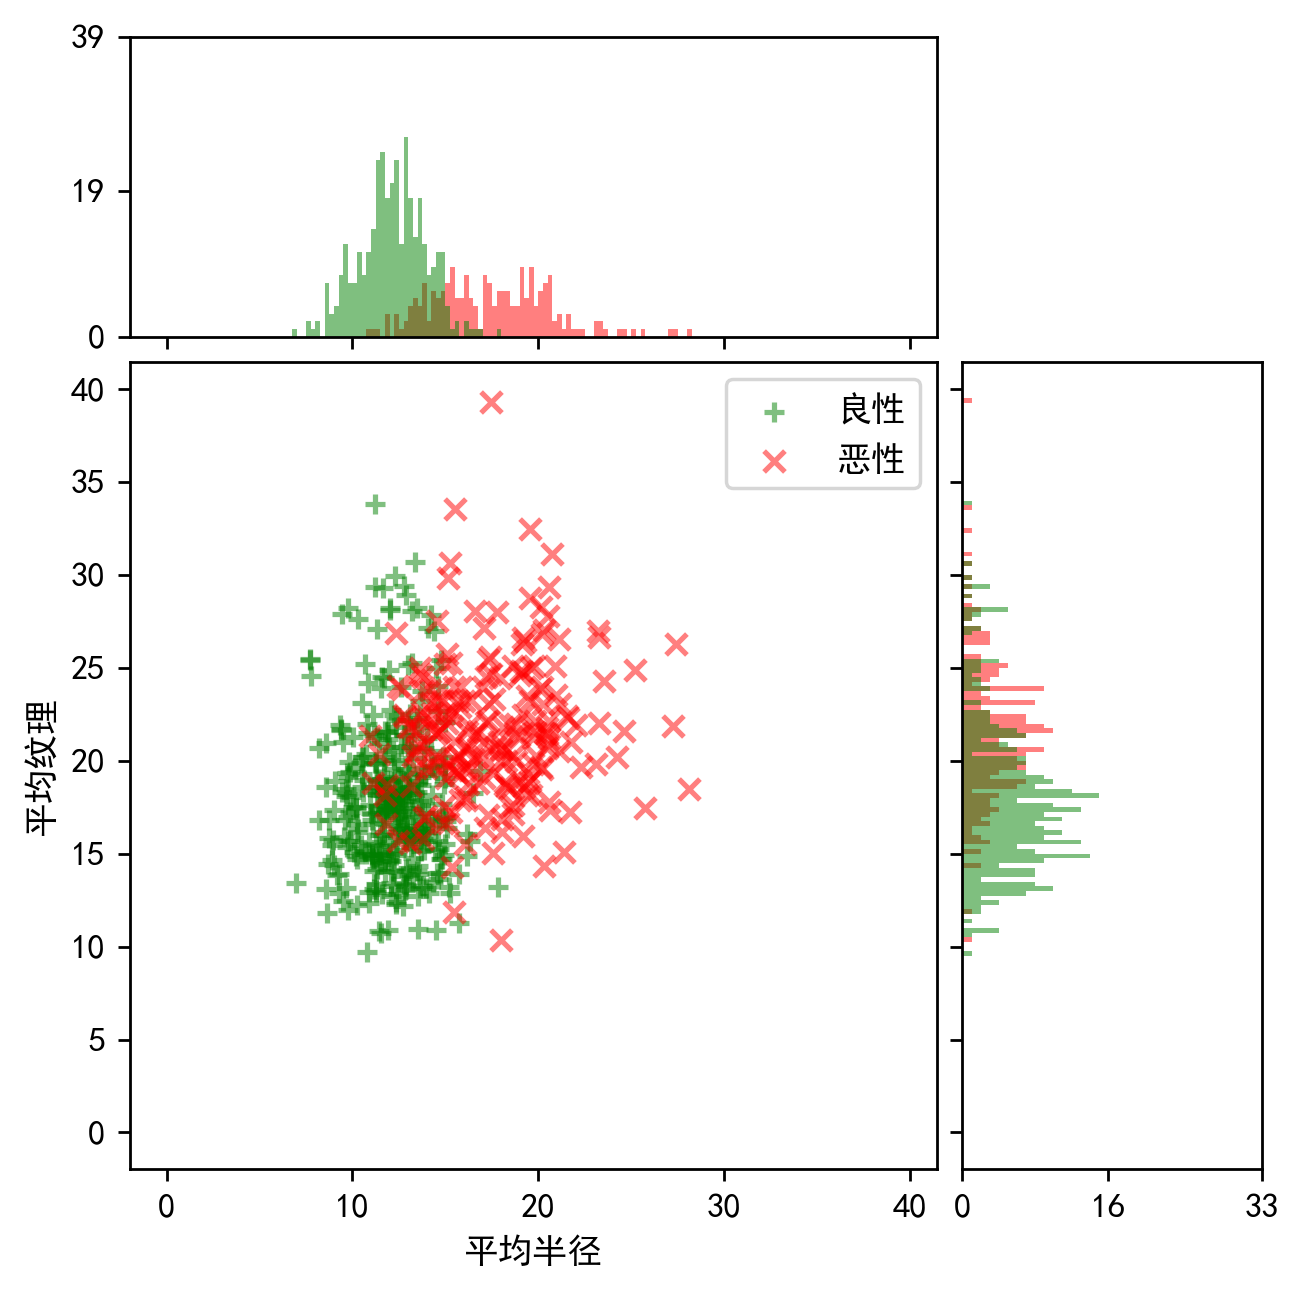

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# for i in range(len(zh_ch_feature)):
#     if i % 2 ==0:
i = 0
x0 = X[Y==0,i]
y0 = X[Y==0,i+1]
x1 = X[Y==1,i]
y1 = X[Y==1,i+1]

fig, ax = plt.subplots(figsize=(6, 6),dpi = 250)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
# the scatter plot:
plt.xlabel(zh_ch_feature[i])
plt.ylabel(zh_ch_feature[i+1])
ax.scatter(x1, y1, c = 'green', alpha=0.5, marker='+', label='良性')
ax.scatter(x0, y0, c = 'red', alpha=0.5, marker='x', label='恶性')
plt.legend(loc='upper right')#lower left
# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(max(x0.max(), x1.max()), max(y0.max(), y1.max()))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(0, lim + binwidth, binwidth)
ax_histx.hist(x0, bins=bins, alpha=0.5, color='red')
ax_histy.hist(y0, bins=bins, orientation='horizontal', alpha=0.5, color='red')
ax_histx.hist(x1, bins=bins, alpha=0.5, color='green')
ax_histy.hist(y1, bins=bins, orientation='horizontal', alpha=0.5, color='green')
# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

ax_histx.set_yticks([0, int(max(x0.max(), y0.max())/2), int(max(x0.max(), y0.max()))])
ax_histy.set_xticks([0, int(max(x1.max(), y1.max())/2), int(max(x1.max(), y1.max()))])

plt.savefig('{},{}.pdf'.format(zh_ch_feature[i], zh_ch_feature[i+1]))
plt.show()

In [9]:
pd.DataFrame(np.cov(X.T),index=features, columns= features).head(5)

mean radius  mean texture  mean perimeter      mean area  \
mean radius        12.418920      4.907582       85.447142    1224.483409   
mean texture        4.907582     18.498909       34.439759     485.993787   
mean perimeter     85.447142     34.439759      590.440480    8435.772345   
mean area        1224.483409    485.993787     8435.772345  123843.554318   
mean smoothness     0.008454     -0.001415        0.070836       0.876178   

                 mean smoothness  mean compactness  mean concavity  \
mean radius             0.008454          0.094197        0.190128   
mean texture           -0.001415          0.053767        0.103692   
mean perimeter          0.070836          0.714714        1.387234   
mean area               0.876178          9.264931       19.244924   
mean smoothness         0.000198          0.000490        0.000585   

                 mean concave points  mean symmetry  mean fractal dimension  \
mean radius                 0.112475       0.014273               -0.007754   
mean texture                0.048977       0.008419               -0.002321   
mean perimeter              0.802360       0.121922               -0.044859   
mean area                  11.241958       1.459596               -0.703426   
mean smoothness             0.000302       0.000215                0.000058   

                 ...  worst radius  worst texture  worst perimeter  \
mean radius      ...     16.513749       6.433100       114.288570   
mean texture     ...      7.329267      24.110148        51.745933   
mean perimeter   ...    113.858063      45.258113       792.328208   
mean area        ...   1637.521341     621.824934     11341.789807   
mean smoothness  ...      0.014487       0.003118         0.112879   

                    worst area  worst smoothness  worst compactness  \
mean radius        1888.227223          0.009625           0.229249   
mean texture        841.283832          0.007611           0.188010   
mean perimeter    13026.148359          0.083526           1.742478   
mean area        192192.557633          0.992514          21.616602   
mean smoothness       1.655299          0.000259           0.001045   

                 worst concavity  worst concave points  worst symmetry  \
mean radius             0.387386              0.172393        0.035746   
mean texture            0.270110              0.083491        0.027942   
mean perimeter          2.858506              1.231848        0.284300   
mean area              37.634415             16.701789        3.125809   
mean smoothness         0.001276              0.000465        0.000343   

                 worst fractal dimension  
mean radius                     0.000450  
mean texture                    0.009260  
mean perimeter                  0.022391  
mean area                       0.023756  
mean smoothness                 0.000127  

[5 rows x 30 columns]

In [10]:
import seaborn as sns

In [9]:
X_data = X_.values.reshape(X.shape[0],-1)
Y_data = Y.reshape(Y.shape[0],-1)
ori_data = np.hstack((X_data, Y_data))

In [6]:
features_plus = features + ['cancer']
zh_ch_feature_plus = zh_ch_feature + ['肿瘤']

In [8]:
BC = pd.DataFrame(ori_data, columns=zh_ch_feature_plus)
BC.head(5)

平均半径   平均纹理    平均周长    平均面积    平均平滑度    平均紧致度    平均凹度     平均凹点    平均对称  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

    平均分形维数  ...  最糟糕的纹理  最糟糕的周长  最糟糕的区域  最糟糕的平滑度  最糟糕的紧致度  最糟糕的凹度    最差凹点  \
0  0.07871  ...   17.33  184.60  2019.0   0.1622   0.6656  0.7119  0.2654   
1  0.05667  ...   23.41  158.80  1956.0   0.1238   0.1866  0.2416  0.1860   
2  0.05999  ...   25.53  152.50  1709.0   0.1444   0.4245  0.4504  0.2430   
3  0.09744  ...   26.50   98.87   567.7   0.2098   0.8663  0.6869  0.2575   
4  0.05883  ...   16.67  152.20  1575.0   0.1374   0.2050  0.4000  0.1625   

   最差的对称性   最差分形维数   肿瘤  
0  0.4601  0.11890  0.0  
1  0.2750  0.08902  0.0  
2  0.3613  0.08758  0.0  
3  0.6638  0.17300  0.0  
4  0.2364  0.07678  0.0  

[5 rows x 31 columns]

In [9]:
# BC['cancer'] = BC['cancer'].map({0.0: 'malignant', 1.0:'benign'})
BC['肿瘤'] = BC['肿瘤'].map({0.0: '恶性', 1.0:'良性'})

In [12]:
sns.set(style="ticks", color_codes=True)

In [50]:
## 谨慎运行
g = sns.pairplot(BC, vars=features,hue='肿瘤',palette='husl')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002927CB58EE0> (for post_execute):


KeyboardInterrupt: 

In [14]:
## 谨慎运行
g.savefig('Covariance matrix.pdf')

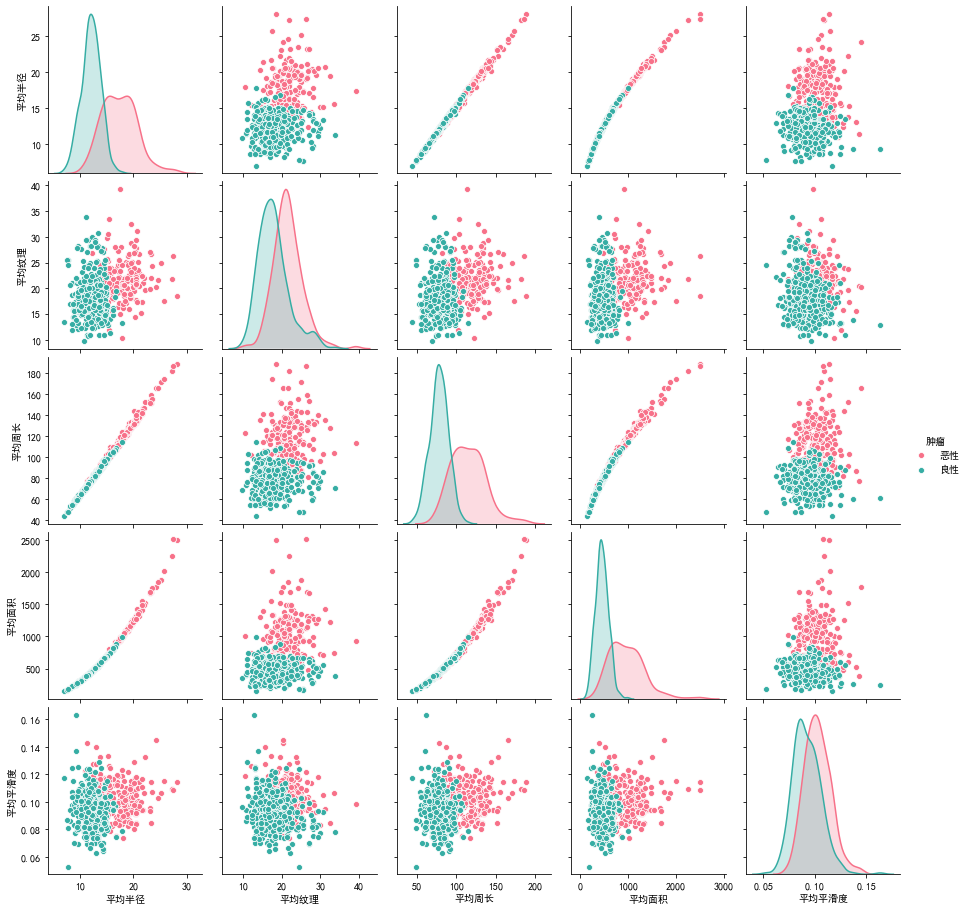

In [52]:
fig = sns.pairplot(BC, vars=zh_ch_feature[:5], hue='肿瘤',palette='husl')

In [53]:
fig.savefig('Covariance matrix s.pdf')

当数据分布如下图时时，其x, y 之间的关系为正相关，若分布的圆圈接近于圆形时，x, y 无相关，方向相反时为负相关。

<img style="float: center;" src="cov.png">

In [10]:
cov_matrix = np.cov(X.T)
df_cov = pd.DataFrame(cov_matrix,index=zh_ch_feature,columns=zh_ch_feature).round(0)
df_cov.to_csv('cov.csv',index=zh_ch_feature,columns=zh_ch_feature)

### 查看两类数据差别

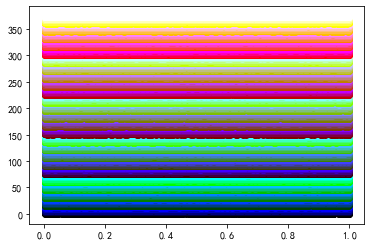

In [57]:
from colormap import rgb2hex

np.random.seed(10)
color_names = []
sample = [0, 0.25, 0.5, 0.75, 1]  # 此处可根据自己情况进行设置,但不能超过225
for i in sample:
    for j in sample:
        for k in sample:
            col = rgb2hex(i, j, k, normalised=True)
            color_names.append(col)
# print(color_names[0])
x = np.random.random((1000, 1))
j = 0
for i in range(len(color_names)):
    y = j*3 + np.random.random((1000, 1)) * 2
    j += 1
    plt.scatter(x, y, color=color_names[i])
plt.show()

In [58]:
colors_malignant = color_names[:60][::2]
colors_benign = color_names[65::2]

len(colors_benign), len(colors_malignant)

(30, 30)

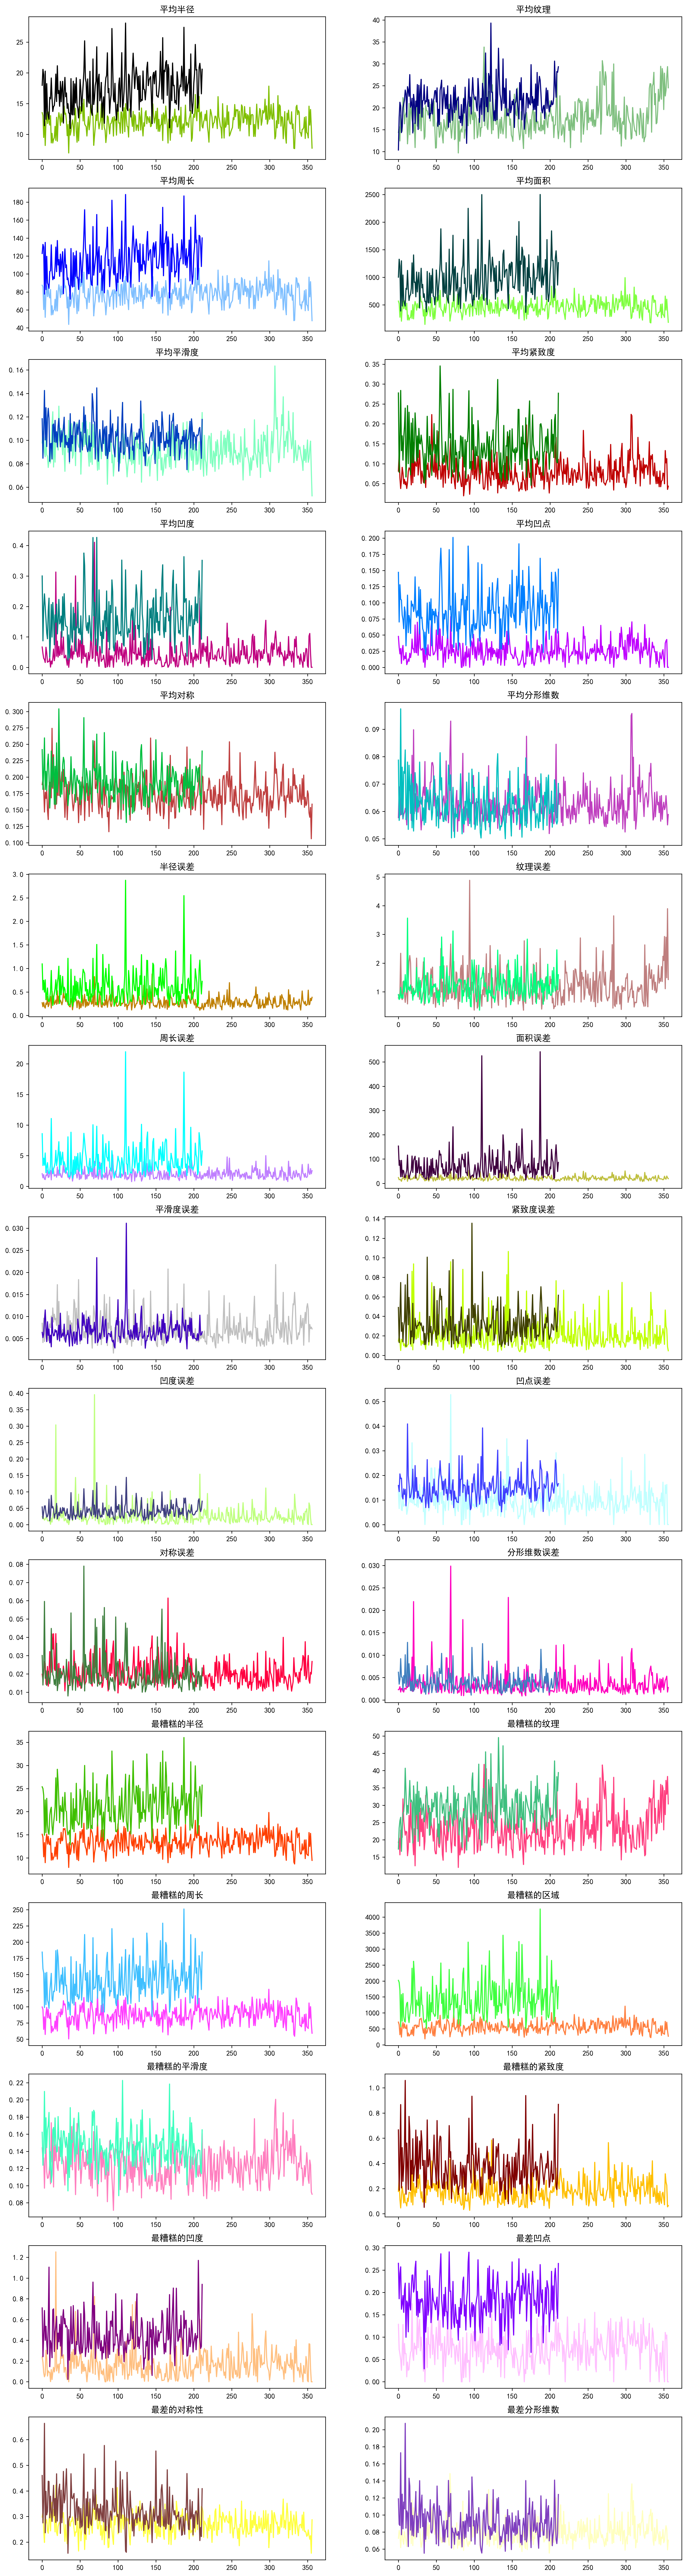

In [59]:
plt.figure(figsize=(16,64),dpi=250)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
for i in range(len(zh_ch_feature)):
    plt.subplot(int(len(zh_ch_feature)/2), 2, i + 1)
    plt.title('{}'.format(zh_ch_feature[i]))
    plt.plot(X[Y==1,i],color=colors_benign[i])
    plt.plot(X[Y==0,i],color=colors_malignant[i])
        
plt.savefig('The relationship between attribute value and cancer.pdf')

可以看出除了平均分形维数、纹理误差、平滑度误差、分形维数误差几个属性外，乳腺肿瘤为恶性的属性值均值都明显大于肿瘤为良性的属性值均值

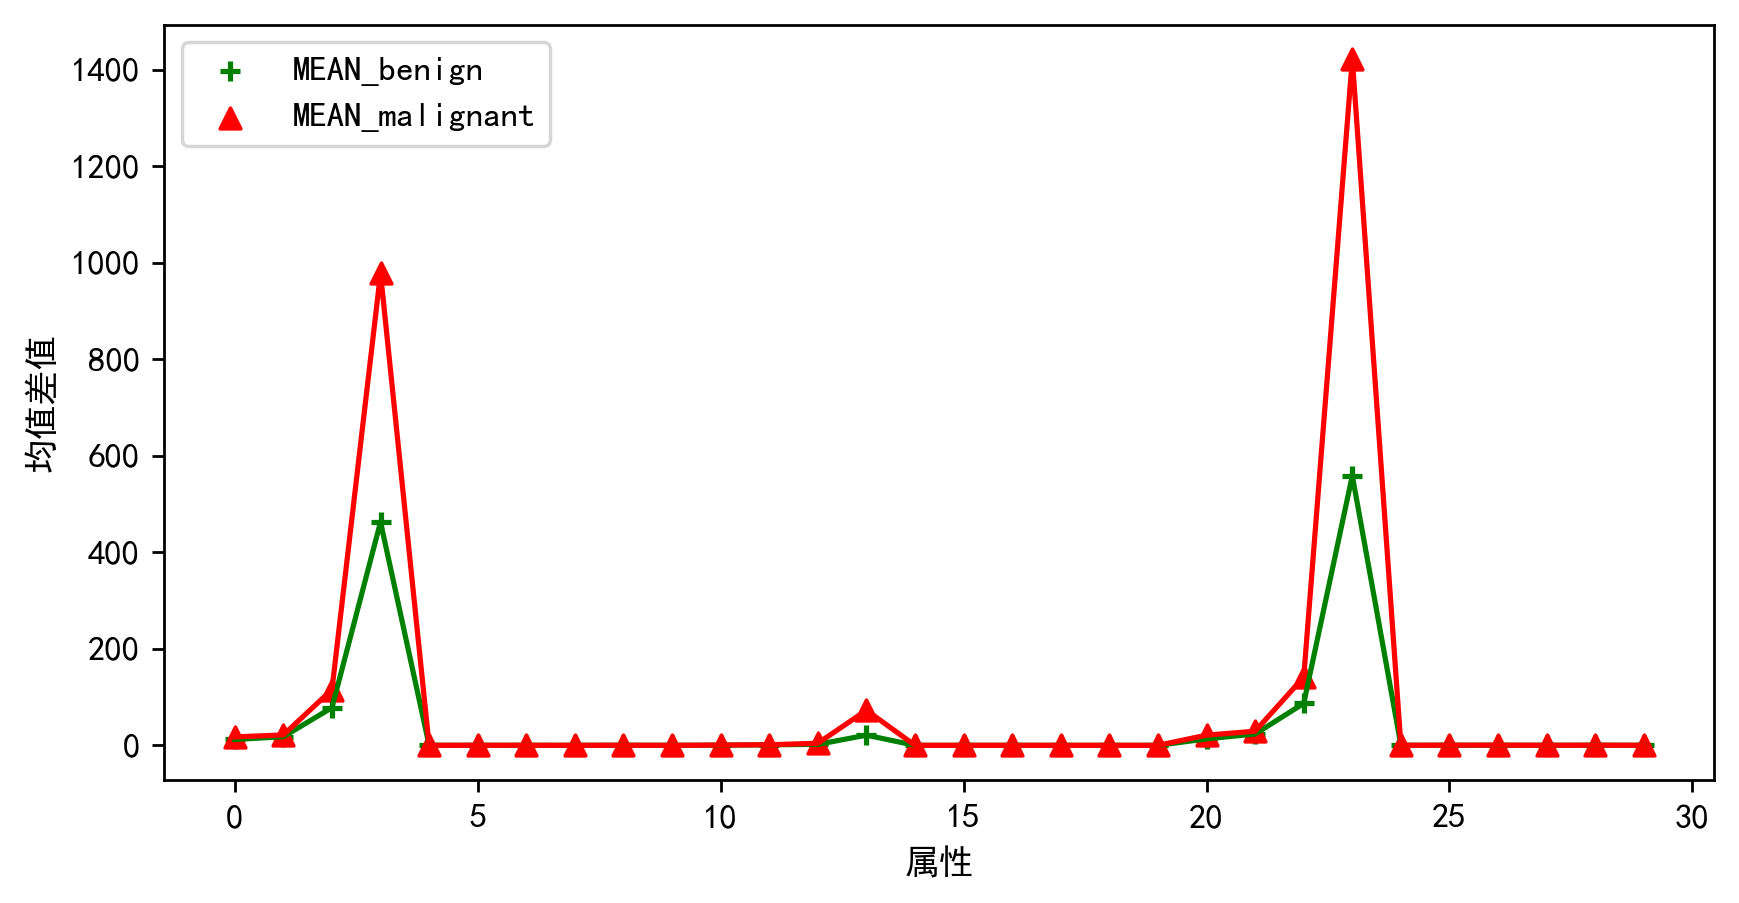

In [61]:
plt.figure(figsize=(8,4),dpi=250)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
MEAN_benign = []
MEAN_malignant = []
for i in range(len(zh_ch_feature)):
    MEAN_benign.append(X[Y==1,i].mean())
    MEAN_malignant.append(X[Y==0,i].mean())
indx = np.linspace(0,29,30)
plt.xlabel('属性')
plt.ylabel('均值差值')
plt.plot(MEAN_benign,c='green')
plt.scatter(indx, MEAN_benign, marker='+',c='green',label='MEAN_benign')
plt.plot(MEAN_malignant,c='red')
plt.scatter(indx, MEAN_malignant, marker='^',c='red',label='MEAN_malignant')
plt.legend(loc = 'upper left')
plt.savefig('difference.svg')
plt.show()

可以看出没有标准化的某些属性的数据均值相差很小，下面进行数据预处理

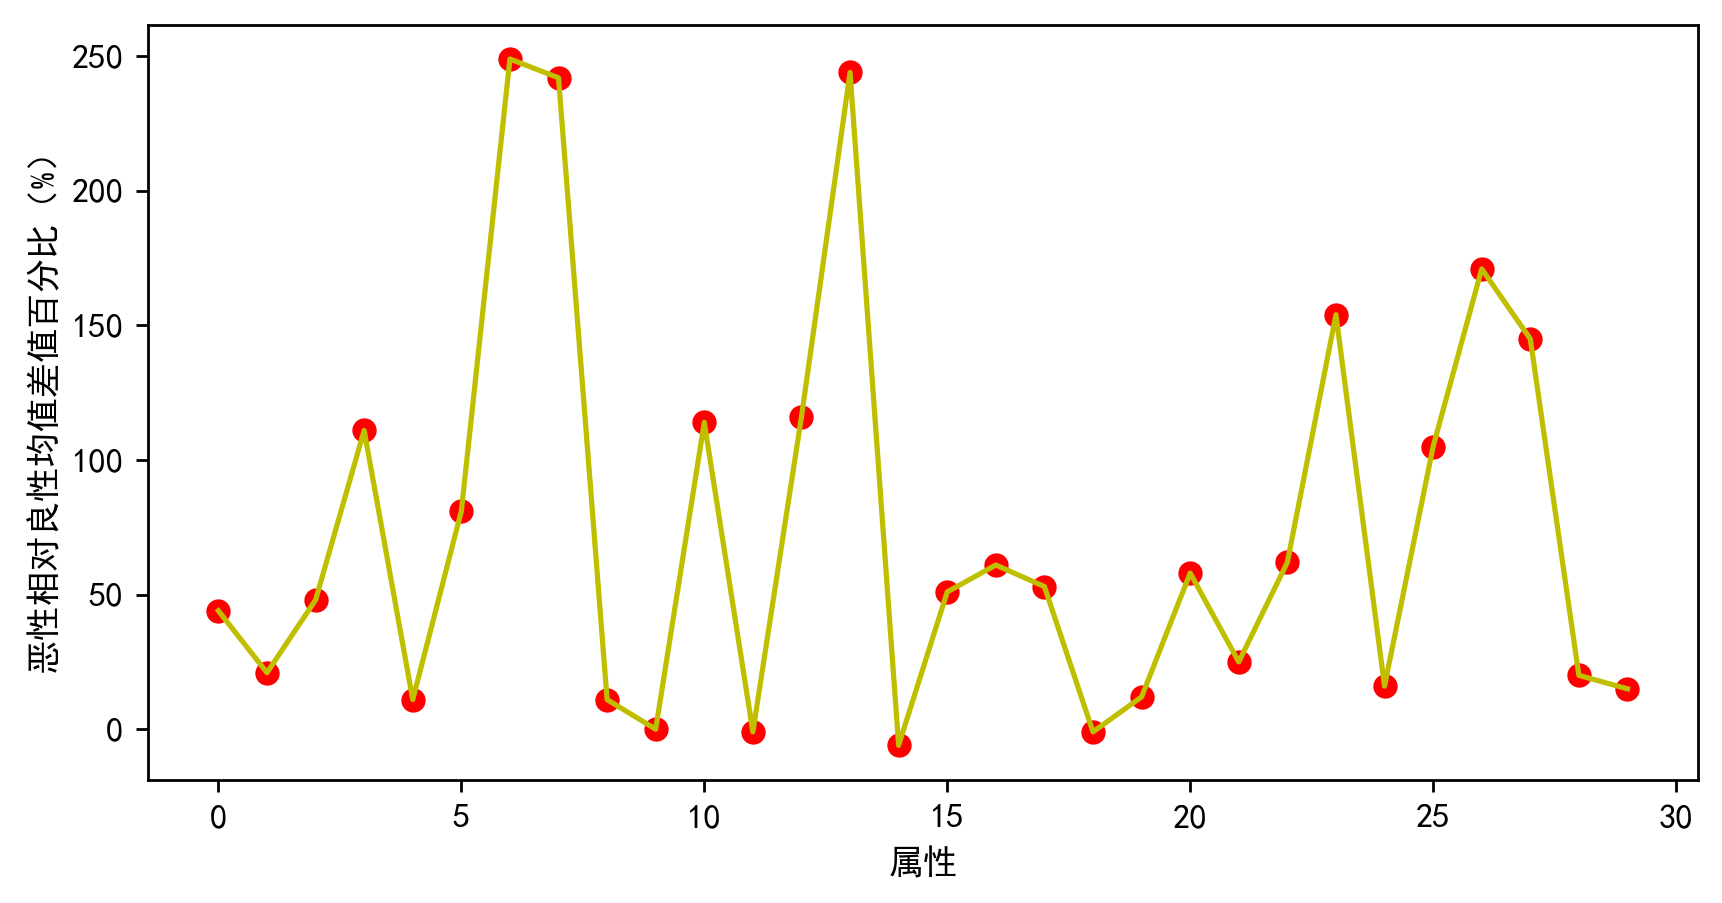

In [62]:
plt.figure(figsize=(8,4),dpi=250)
err = np.round((np.array(MEAN_malignant)-np.array(MEAN_benign))/np.array(MEAN_benign), 2)*100
plt.xlabel('属性')
plt.ylabel('恶性相对良性均值差值百分比（%）')
plt.plot(err, c='y')
plt.scatter(indx, err, marker='o',c='r',label='error')
plt.savefig('error.pdf')
plt.show()

In [73]:
err

array([ 44.,  21.,  48., 111.,  11.,  81., 249., 242.,  11.,  -0., 114.,
        -1., 116., 244.,  -6.,  51.,  61.,  53.,  -1.,  12.,  58.,  25.,
        62., 154.,  16., 105., 171., 145.,  20.,  15.])

通过上图可以看出大部分属性的恶性情况下均值大于良性情况下均值。

## 检查数据中是否存在缺失值

In [131]:
df = X_.isnull()

for u in df.columns:
    if df[u].dtype==bool:
        df[u]=df[u].astype('int')

In [132]:
df.sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

通过检查每个单元格是否为空（null)，再将bool型转化为int(0/1)求和，发现每列的求和值均为0，说明没有空值，即无缺失值。

## 查看每个属性数据的最小值

In [93]:
X_.min(axis=0)

平均半径         6.981000
平均纹理         9.710000
平均周长        43.790000
平均面积       143.500000
平均平滑度        0.052630
平均紧致度        0.019380
平均凹度         0.000000
平均凹点         0.000000
平均对称         0.106000
平均分形维数       0.049960
半径误差         0.111500
纹理误差         0.360200
周长误差         0.757000
面积误差         6.802000
平滑度误差        0.001713
紧致度误差        0.002252
凹度误差         0.000000
凹点误差         0.000000
对称误差         0.007882
分形维数误差       0.000895
最糟糕的半径       7.930000
最糟糕的纹理      12.020000
最糟糕的周长      50.410000
最糟糕的区域     185.200000
最糟糕的平滑度      0.071170
最糟糕的紧致度      0.027290
最糟糕的凹度       0.000000
最差凹点         0.000000
最差的对称性       0.156500
最差分形维数       0.055040
dtype: float64

In [96]:
pd.DataFrame(X_.max(axis=0).values).to_csv('max.csv')

In [95]:
pd.DataFrame(X_.min(axis=0).values).to_csv('min.csv')

发现mean concavity, mean concave points, worst concavity, worst concave points的最小值为0，

这几个属性分别指平均凹点，平均凹点，最差凹点，最差凹点，是可以为0的。

## 归一化

通过上面查看最小值也可以发现不同属性的数据值相差较大，

因此需要进行归一化，根据课程所学，将归一化范围设置为[0.1, 0.9]

In [7]:
X_norm = pd.DataFrame()
for col in zh_ch_feature:
    ma = X_[col].max()
    mi = X_[col].min()
    X_norm[col] = 0.1 + (X_[col] - mi) / (ma - mi)*(0.9-0.1)

In [8]:
X_norm.head(5)

平均半径      平均纹理      平均周长      平均面积     平均平滑度     平均紧致度      平均凹度  \
0  0.516830  0.118126  0.536791  0.390986  0.575002  0.733630  0.662512   
1  0.614516  0.318059  0.592627  0.501273  0.331904  0.245414  0.262887   
2  0.581196  0.412208  0.576595  0.459533  0.511447  0.444813  0.470009   
3  0.268072  0.388671  0.286801  0.182324  0.749057  0.749089  0.552484   
4  0.603914  0.225262  0.604789  0.491432  0.444281  0.378314  0.471134   

       平均凹点      平均对称    平均分形维数  ...    最糟糕的半径    最糟糕的纹理    最糟糕的周长    最糟糕的区域  \
0  0.684891  0.649091  0.584414  ...  0.596620  0.213220  0.634648  0.460558   
1  0.379006  0.403838  0.213058  ...  0.585521  0.342857  0.531854  0.448171   
2  0.608549  0.507677  0.268997  ...  0.545109  0.388060  0.506753  0.399607   
3  0.518290  0.721010  0.900000  ...  0.298648  0.408742  0.293077  0.175206   
4  0.514712  0.402626  0.249452  ...  0.515795  0.199147  0.505558  0.373260   

    最糟糕的平滑度   最糟糕的紧致度    最糟糕的凹度      最差凹点    最差的对称性    最差分形维数  
0  0.580909  0.595433  0.554888  0.829622  0.578770  0.435091  
1  0.378043  0.223651  0.254377  0.611340  0.286872  0.278303  
2  0.486872  0.408300  0.387796  0.768041  0.422965  0.270746  
3  0.832378  0.751209  0.538914  0.807904  0.900000  0.718969  
4  0.449891  0.237932  0.355591  0.546735  0.226000  0.214076  

[5 rows x 30 columns]

In [8]:
X_norm.min(), X_norm.max()

(mean radius                0.1
 mean texture               0.1
 mean perimeter             0.1
 mean area                  0.1
 mean smoothness            0.1
 mean compactness           0.1
 mean concavity             0.1
 mean concave points        0.1
 mean symmetry              0.1
 mean fractal dimension     0.1
 radius error               0.1
 texture error              0.1
 perimeter error            0.1
 area error                 0.1
 smoothness error           0.1
 compactness error          0.1
 concavity error            0.1
 concave points error       0.1
 symmetry error             0.1
 fractal dimension error    0.1
 worst radius               0.1
 worst texture              0.1
 worst perimeter            0.1
 worst area                 0.1
 worst smoothness           0.1
 worst compactness          0.1
 worst concavity            0.1
 worst concave points       0.1
 worst symmetry             0.1
 worst fractal dimension    0.1
 dtype: float64,
 mean radius           

In [14]:
### 反归一化
recover_data = pd.DataFrame()
for col in zh_ch_feature:
    ma = X_[col].max()
    mi = X_[col].min()
    recover_data[col] = mi+(X_norm[col]-0.1)/(0.9-0.1)*(ma-mi)

In [15]:
recover_data.head(5)

平均半径   平均纹理    平均周长    平均面积    平均平滑度    平均紧致度    平均凹度     平均凹点    平均对称  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

    平均分形维数  ...  最糟糕的半径  最糟糕的纹理  最糟糕的周长  最糟糕的区域  最糟糕的平滑度  最糟糕的紧致度  最糟糕的凹度  \
0  0.07871  ...   25.38   17.33  184.60  2019.0   0.1622   0.6656  0.7119   
1  0.05667  ...   24.99   23.41  158.80  1956.0   0.1238   0.1866  0.2416   
2  0.05999  ...   23.57   25.53  152.50  1709.0   0.1444   0.4245  0.4504   
3  0.09744  ...   14.91   26.50   98.87   567.7   0.2098   0.8663  0.6869   
4  0.05883  ...   22.54   16.67  152.20  1575.0   0.1374   0.2050  0.4000   

     最差凹点  最差的对称性   最差分形维数  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 30 columns]

In [16]:
X_.head(5)

平均半径   平均纹理    平均周长    平均面积    平均平滑度    平均紧致度    平均凹度     平均凹点    平均对称  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

    平均分形维数  ...  最糟糕的半径  最糟糕的纹理  最糟糕的周长  最糟糕的区域  最糟糕的平滑度  最糟糕的紧致度  最糟糕的凹度  \
0  0.07871  ...   25.38   17.33  184.60  2019.0   0.1622   0.6656  0.7119   
1  0.05667  ...   24.99   23.41  158.80  1956.0   0.1238   0.1866  0.2416   
2  0.05999  ...   23.57   25.53  152.50  1709.0   0.1444   0.4245  0.4504   
3  0.09744  ...   14.91   26.50   98.87   567.7   0.2098   0.8663  0.6869   
4  0.05883  ...   22.54   16.67  152.20  1575.0   0.1374   0.2050  0.4000   

     最差凹点  最差的对称性   最差分形维数  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 30 columns]

In [8]:
### 调包实现
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
mm_data = min_max_scaler.fit_transform(X)
origin_data = min_max_scaler.inverse_transform(mm_data)

In [136]:
X==origin_data

array([[False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True]])

## 通过分层采样划分训练集和测试集

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_data = X_norm.values.reshape(X.shape[0],-1)
Y_data = Y.reshape(Y.shape[0],-1)

In [11]:
data = np.hstack((X_data, Y_data))

In [11]:
pd.DataFrame(data, columns=zh_ch_feature_plus).head(5)

平均半径      平均纹理      平均周长      平均面积     平均平滑度     平均紧致度      平均凹度  \
0  0.516830  0.118126  0.536791  0.390986  0.575002  0.733630  0.662512   
1  0.614516  0.318059  0.592627  0.501273  0.331904  0.245414  0.262887   
2  0.581196  0.412208  0.576595  0.459533  0.511447  0.444813  0.470009   
3  0.268072  0.388671  0.286801  0.182324  0.749057  0.749089  0.552484   
4  0.603914  0.225262  0.604789  0.491432  0.444281  0.378314  0.471134   

       平均凹点      平均对称    平均分形维数  ...    最糟糕的纹理    最糟糕的周长    最糟糕的区域   最糟糕的平滑度  \
0  0.684891  0.649091  0.584414  ...  0.213220  0.634648  0.460558  0.580909   
1  0.379006  0.403838  0.213058  ...  0.342857  0.531854  0.448171  0.378043   
2  0.608549  0.507677  0.268997  ...  0.388060  0.506753  0.399607  0.486872   
3  0.518290  0.721010  0.900000  ...  0.408742  0.293077  0.175206  0.832378   
4  0.514712  0.402626  0.249452  ...  0.199147  0.505558  0.373260  0.449891   

    最糟糕的紧致度    最糟糕的凹度      最差凹点    最差的对称性    最差分形维数   肿瘤  
0  0.595433  0.554888  0.829622  0.578770  0.435091  0.0  
1  0.223651  0.254377  0.611340  0.286872  0.278303  0.0  
2  0.408300  0.387796  0.768041  0.422965  0.270746  0.0  
3  0.751209  0.538914  0.807904  0.900000  0.718969  0.0  
4  0.237932  0.355591  0.546735  0.226000  0.214076  0.0  

[5 rows x 31 columns]

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(data[:,:-1],data[:,-1]):
    train_set = data[train_index,:]
    test_set = data[test_index,:]

In [14]:
df_train_set = pd.DataFrame(train_set, columns=features_plus)
df_test_set = pd.DataFrame(test_set, columns=features_plus)

In [15]:
print('训练集样本数量：{}个, 良性样本：{}个, 恶性样本：{}个'.format(len(train_set), df_train_set['cancer'].sum(), len(train_set)-df_train_set['cancer'].sum()))
      
print('测试集样本数量：{}个, 良性样本：{}个, 恶性样本：{}个, '.format(len(test_set), df_test_set['cancer'].sum(), len(test_set)-df_test_set['cancer'].sum()))
print('数据集中良性样本比例：{}%, 训练集中良性样本比例：{}%, 测试集中良性样本比例：{}%'.format(np.round(Y.sum()/len(Y)*100, 2), np.round(df_train_set['cancer'].sum()/len(train_set)*100,2),np.round(df_test_set['cancer'].sum()/len(test_set)*100,2)))

训练集样本数量：455个, 良性样本：285.0个, 恶性样本：170.0个
测试集样本数量：114个, 良性样本：72.0个, 恶性样本：42.0个, 
数据集中良性样本比例：62.74%, 训练集中良性样本比例：62.64%, 测试集中良性样本比例：63.16%


In [16]:
train_set_X = train_set[:,:-1].T
train_set_Y = train_set[:,-1].reshape(-1,1).T
print(train_set_X.shape, train_set_Y.shape)
test_set_X = test_set[:,:-1].T
test_set_Y = test_set[:,-1].reshape(-1,1).T
print(test_set_X.shape, test_set_Y.shape)

(30, 455) (1, 455)
(30, 114) (1, 114)


In [17]:
df_train_set_X = pd.DataFrame(train_set_X.T, columns=features)
df_train_set_X.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.226423      0.279642        0.218969   0.161557         0.401237   
1     0.599749      0.365945        0.597602   0.475483         0.538169   
2     0.239297      0.247176        0.231021   0.169938         0.354870   
3     0.349098      0.213358        0.347668   0.241777         0.478947   
4     0.266179      0.348360        0.256893   0.185684         0.349165   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.174989        0.118969             0.121849       0.433333   
1          0.417821        0.499813             0.600596       0.368283   
2          0.158009        0.100000             0.100000       0.450707   
3          0.344942        0.247329             0.276978       0.464444   
4          0.175333        0.144967             0.186402       0.485051   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.303033  ...      0.194486       0.307889         0.182514   
1                0.278096  ...      0.501281       0.378252         0.480856   
2                0.264954  ...      0.202739       0.253092         0.190801   
3                0.320219  ...      0.300640       0.208955         0.301962   
4                0.261584  ...      0.226076       0.401066         0.215065   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.139265          0.402873           0.147447         0.128013   
1    0.354385          0.603625           0.307166         0.439169   
2    0.143866          0.292459           0.131528         0.100000   
3    0.198584          0.450948           0.288228         0.264665   
4    0.153893          0.314647           0.154168         0.148109   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.165457        0.275991                 0.199436  
1              0.697388        0.331342                 0.234908  
2              0.100000        0.280564                 0.134632  
3              0.349897        0.336546                 0.240260  
4              0.270529        0.368401                 0.178184  

[5 rows x 30 columns]

============================== 数据处理完毕 ==============================

# 构建BP神经网络

构建神经网络的一般方法是： 

1. 定义神经网络结构（输入单元的数量，隐藏单元的数量等）。 

2. 初始化模型的参数 

3. 循环：


- 实施前向传播

- 计算损失函数值

- 实现向后传播

- 更新参数（梯度下降）

需要将它们合并到一个nn_model() 函数中，当我们构建好了nn_model（）并学习了正确的参数，我们就可以预测新的数据。

## 定义神经网络结构

在构建之前，我们要先把神经网络的结构给定义好：

n_x: 输入层的数量

n_h: 隐藏层的数量（这里设初始值为60）

n_y: 输出层的数量

## 神经网络模型图示
<img style="float: left;" src="nn_model.png">

In [17]:
def layer_sizes(X , Y):
    """
    参数：
    X - 输入数据集，维度为（输入的数量，训练/测试的数量）
    Y - 标签，维度为（输出的数量，训练/测试的数量）
    
    返回：
    n_x - 输入层的数量
    n_h - 隐藏层的数量
    n_y - 输出层的数量
    """
    
    n_x = X.shape[0] #输入层
    n_h = 60 #隐藏层，硬编码为60
    n_y = Y.shape[0] #输出层
#     print('n_x:{},n_h:{},n_y:{}'.format(n_x , n_h , n_y))
    return (n_x , n_h , n_y)

In [17]:
# test layer_sizes
print("===== test layer_sizes =====")
X_asses , Y_asses = layer_sizes_test_case()
(n_x , n_h , n_y) = layer_sizes(X_asses , Y_asses)
print("输入层的节点数量为：n_x = " + str(n_x))
print("隐藏层的节点数量为：n_h = " + str(n_h))
print("输出层的节点数量为：n_y = " + str(n_y))

===== test layer_sizes =====
输入层的节点数量为：n_x = 30
隐藏层的节点数量为：n_h = 60
输出层的节点数量为：n_y = 2


## 初始化模型的参数

在这里，我们要实现函数initialize_parameters()。

通过用随机值初始化权重矩阵$\omega$

- np.random.randn(a，b)* 0.01来随机初始化一个维度为(a，b)的矩阵。

将向量$b$初始化为零。 

- np.zeros((a，b))用零初始化矩阵（a，b）。

In [18]:
def initialize_parameters(n_x , n_h , n_y):
    """
    参数：
        n_x - 输入层节点的数量
        n_h - 隐藏层节点的数量
        n_y - 输出层节点的数量
        
    返回：
        parameters - 包含参数的字典：
            W1 - 权重矩阵，维度为（n_h，n_x）
            b1 - 维度为（n_h,1）
            W2 - 权重矩阵，维度为（n_y,n_h）
            b2 - 维度为（n_y,1）
            
    """
    np.random.seed(2) #指定一个随机种子，以便你的输出与我们的一样。
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros(shape = (n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros(shape = (n_y,1))
    
    #use assert to ensure my data format is correct
    assert(W1.shape == (n_h,n_x))
    assert(b1.shape == (n_h,1))
    assert(W2.shape == (n_y,n_h))
    assert(b2.shape == (n_y,1))
    
    parameters = {"W1" : W1,
                  "b1" : b1,
                  "W2" : W2,
                  "b2" : b2
                 }
    
    return parameters

In [21]:
# test initialize_parameters
print("===== test initialize_parameters =====")
n_x , n_h , n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x , n_h , n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

===== test initialize_parameters =====
W1 = [[-0.00416758 -0.00056267 -0.02136196 ... -0.01187612 -0.01421217
  -0.00153495]
 [-0.00269057  0.02231367 -0.02434768 ...  0.00508396  0.00216116
  -0.01858612]
 [-0.00419316 -0.00132329 -0.0003957  ...  0.01217886 -0.00462005
   0.00350888]
 ...
 [ 0.00427641  0.00745141 -0.00838512 ... -0.01289933 -0.0076847
   0.01458999]
 [ 0.01469479 -0.00803988  0.00814497 ... -0.00124274 -0.00730243
   0.00029359]
 [ 0.00611436  0.01391156  0.01186971 ... -0.00927679  0.00445539
  -0.00323923]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.01804312  0.00096396  0.00720144  0.01195716  0.00133329  0.00598217
  -0.01729981  0.021

## 循环

### 前向传播

我们现在要实现前向传播函数forward_propagation()。 
我们可以使用sigmoid()函数，也可以使用np.tanh()函数,此处先使用sigmoid()函数。 
步骤如下：

- 使用字典类型的parameters（它是initialize_parameters() 的输出）检索每个参数。
- 实现向前传播, 计算$Z^{[1]},A^{[1]},Z^{[2]}和 A^{[2]}$（ 训练集里面所有例子的预测向量）。
- 反向传播所需的值存储在“cache”中，cache将作为反向传播函数的输入。

In [19]:
def forward_propagation( X , parameters ):
    """
    参数：
        X - 维度为（n_x,m）的输入数据。
        parameters - 初始化函数（initialize_parameters）的输出
        
    返回：
        A2 - 使用sigmoid()函数计算的第二次激活后的数值
        cache - 包含"Z1"，“A1”，“Z2”和“A2”的字典类型变量
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #前向传播计算A2
    Z1 = np.dot(W1 , X) + b1
    A1 = sigmoid(Z1) #np.tanh(Z1)
    Z2 = np.dot(W2 , A1) + b2
    A2 = sigmoid(Z2)
#     print('A2.shape:{},X.shape[1]:{}'.format(A2.shape, X.shape[1]))
    #使用断言确保我的数据格式是正确的
    assert(A2.shape == (1,X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return (A2, cache)

In [31]:
# tests forward_propagation
print("===== test forward_propagation =====")
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess,parameters)
print(np.mean(cache["Z1"]),np.mean(cache["A1"]),np.mean(cache["Z2"]),np.mean(cache["A2"]))

===== test forward_propagation =====
-0.0004997557777419902 0.499875235767495 0.004493097349581198 0.5011232724388964


现在我们已经计算了$A^{[2]}，a^{[2](i)}$包含了训练集里每个数值，现在我们就可以构建成本函数了。

### 定义损失函数
$$J(w,b)=-\frac{1}{m}\sum\limits_{i=0}^{m}[yloga+(1-y)log(1-a)]$$

In [20]:
def compute_cost(A2,Y,parameters):
    """
    
    参数：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         Y - "True"标签向量,维度为（1，数量）
         parameters - 一个包含W1，B1，W2和B2的字典类型的变量

    返回：
         成本 - 交叉熵成本给出方程（13）
    
    """
    
    m = Y.shape[1]
#     W1 = parameters["W1"]
#     W2 = parameters["W2"]
    
    #计算成本
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1 - Y),np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    assert(isinstance(cost,float))
    
    return cost

In [33]:
# test compute_cost
print("===== test compute_cost =====")
A2 , Y_assess , parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2 , Y_assess , parameters)))

===== test compute_cost =====
cost = 0.6929198937761266


使用正向传播期间计算的cache，现在可以利用它实现反向传播。

### 定义反向传播函数

$$\begin{aligned}
\frac{\partial}{\partial \omega}J(\omega, b)&=\frac{\partial J}{\partial a}\cdot\frac{\partial a}{\partial z}\cdot\frac{\partial z}{\partial \omega}\\
&=-\frac{1}{m}\sum\limits_x[y\cdot\frac{1}{a}a(1-a)\cdot x^T + (1-y)\cdot(-\frac{1}{1-a})(1-a)a\cdot x^T]\\
&=-\frac{1}{m}\sum\limits_x[y(1-a)x^T+(1-y)(-a)x^T]\\
&=\frac{1}{m}\sum\limits_x[(a-y)x^T]\\
\frac{\partial}{\partial b}J(\omega, b)&=\frac{\partial J}{\partial a}\cdot\frac{\partial a}{\partial z}\frac{\partial z}{\partial b}\\
&=-\frac{1}{m}\sum\limits_x[y\cdot\frac{1}{a}a(1-a)+ (1-y)\cdot(-\frac{1}{1-a})(1-a)a]\\
&=-\frac{1}{m}\sum\limits_x[y(1-a)+(1-y)(-a)]\\
&=\frac{1}{m}\sum\limits_x (a-y)\\
d\omega&=xdz\\
db&=dz\end{aligned}$$

In [21]:
def backward_propagation(parameters , cache , X , Y):
    """
    参数：
     parameters - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（30，数量）
     Y - “True”标签，维度为（1，数量）

    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """
    
    m = X.shape[1]
#     W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2 , A1.T)
    db2 = (1 / m) * np.sum(dZ2 , axis = 1 , keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), A1*(1-A1))#np.multiply(np.dot(W2.T , dZ2), 1 - np.power(A1 , 2))
    dW1 = (1 / m) * np.dot(dZ1 , X.T)
    db1 = (1 / m) * np.sum(dZ1 , axis = 1 , keepdims = True)
    grads = {"dW1" : dW1,
             "db1" : db1,
             "dW2" : dW2,
             "db2" : db2}
    
    return grads

In [23]:
# test backward_propagation
print("===== test backward_propagation =====")
parameters , cache , X_assess , Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters , cache , X_assess , Y_assess)
print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db1"]))

===== test backward_propagation =====
dW1 = [[-3.74529271e-05  2.64175415e-05]
 [-2.82692879e-04  1.00471501e-04]
 [ 6.60485782e-05 -6.44243506e-05]
 [-2.61091587e-04  1.71173731e-05]]
db1 = [[-3.86086634e-05]
 [-2.93737738e-04]
 [ 6.47448613e-05]
 [-3.00563536e-04]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[-3.86086634e-05]
 [-2.93737738e-04]
 [ 6.47448613e-05]
 [-3.00563536e-04]]


定义更新参数的函数

$$\theta_i:=\theta_i−\alpha\frac{\partial J}{\partial \theta_i}, i=0,1$$

In [22]:
def update_parameters(parameters,grads,learning_rate=0.5):
    """
    使用上面给出的梯度下降更新规则更新参数

    参数：
     parameters - 包含参数的字典类型的变量。
     grads - 包含导数值的字典类型的变量。
     learning_rate - 学习速率

    返回：
     parameters - 包含更新参数的字典类型的变量。
    """
    
    W1,W2 = parameters["W1"],parameters["W2"]
    b1,b2 = parameters["b1"],parameters["b2"]
    
    dW1,dW2 = grads["dW1"],grads["dW2"]
    db1,db2 = grads["db1"],grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [37]:
# test update_parameters
print("===== test update_parameters =====")
parameters,grads = update_parameters_test_case()
parameters = update_parameters(parameters,grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

===== test update_parameters =====
W1 = [[-0.006267    0.01792921]
 [-0.02352903  0.03487509]
 [-0.01676255 -0.01895725]
 [ 0.00981865 -0.05423187]]
b1 = [[-9.50308498e-07]
 [ 1.00646934e-05]
 [ 6.99888206e-07]
 [-2.81884090e-06]]
W2 = [[-0.01042311 -0.04204123  0.01670053  0.04568113]]
b2 = [[9.69415948e-05]]


### 定义主函数

我们现在把上面的东西整合到nn_model()中，神经网络模型必须以正确的顺序使用先前的功能。

In [54]:
def nn_model(X,Y,n_h,num_iterations,print_cost=False, eps = 0.01, l=0.5):
    """
    参数：
        X - 数据集,维度为（30，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    
    np.random.seed(3) #指定随机种子
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
#     print('n_x:{}, n_y:{}'.format(n_x, n_y))
    
    parameters = initialize_parameters(n_x,n_h,n_y)
#     W1 = parameters["W1"]
#     b1 = parameters["b1"]
#     W2 = parameters["W2"]
#     b2 = parameters["b2"]
    
    costs=[]
    data=open("Sigmoid_Results.txt",'w+') 
    print('================ Sigmoid函数，P={}的BP网络运算结果 ================'.format(n_h)+'\n',file=data)
    for i in range(num_iterations):
        A2 , cache = forward_propagation(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads,learning_rate=l)
        if print_cost:
            if i%1000 == 0:
                print("第"+str(i)+"次循环，成本为："+str(cost) ,file=data)
                print("第 ", i ," 次循环，成本为：" + str(cost))
                costs.append(cost)
        if cost < eps: 
            print("第 ", i ," 次循环，成本为：" + str(cost))
            print("第"+str(i)+"次循环，成本为："+str(cost),file=data)
            print('递归结束！')
            print('递归结束！',file=data)
            break
    data.close()
            
    return parameters, costs

In [93]:
# test nn_model
print("===== test nn_model =====")
X_assess,Y_assess = nn_model_test_case()

parameters,costs = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

===== test nn_model =====
第  0  次循环，成本为：0.693297195469159
第  30  次循环，成本为：-0.05708647141690526
递归结束！
W1 = [[-0.85585762  0.65302705]
 [-1.06542988  0.82475928]
 [-0.73812821  0.54146724]
 [ 0.15355435 -0.12342532]]
b1 = [[0.03377065]
 [0.09247013]
 [0.01062102]
 [0.01261907]]
W2 = [[-1.09441909 -1.49154075 -0.88247029  0.31049455]]
b2 = [[0.38908833]]


### 预测

构建predict()来使用模型进行预测，使用向前传播来预测结果。

In [24]:
def predict(parameters,X):
    """
    
    使用学习的参数，为X中的每个示例预测一个类

    参数：
        parameters - 包含参数的字典类型的变量。
        X - 输入数据（n_x，m）

    返回
        predictions - 我们模型预测的向量（恶性：0 /良性：1）

    """
    
    A2 , cache = forward_propagation(X,parameters)
#     print(A2)
    predictions = np.round(A2)
    
    return predictions

In [32]:
# test predict
print("===== test predict =====")

parameters , X_assess = predict_test_case()

predictions = predict(parameters , X_assess)
print("预测的样本特征值平均值 = " + str(np.mean(predictions)))

===== test predict =====
预测的样本特征值平均值 = 1.0


In [66]:
## 谨慎运行
parameters, costs = nn_model(train_set_X, train_set_Y, n_h = 60, num_iterations=200000, print_cost=True, eps=0.01, l=0.5)

第  0  次循环，成本为：0.6912998534135472
第  1000  次循环，成本为：0.08863684014381347
第  2000  次循环，成本为：0.06726070469084577
第  3000  次循环，成本为：0.05888524564483191
第  4000  次循环，成本为：0.05411189874759473
第  5000  次循环，成本为：0.05096223928293986
第  6000  次循环，成本为：0.04868375012400665
第  7000  次循环，成本为：0.04694606343481874
第  8000  次循环，成本为：0.04557669814037332
第  9000  次循环，成本为：0.04446706246345728
第  10000  次循环，成本为：0.04354341096276265
第  11000  次循环，成本为：0.0427561237917095
第  12000  次循环，成本为：0.04207177023377447
第  13000  次循环，成本为：0.04146713428270945
第  14000  次循环，成本为：0.04092549118338375
第  15000  次循环，成本为：0.040434423212149316
第  16000  次循环，成本为：0.03998449353236081
第  17000  次循环，成本为：0.03956839480004228
第  18000  次循环，成本为：0.03918037804886903
第  19000  次循环，成本为：0.03881585770724258
第  20000  次循环，成本为：0.03847113197612094
第  21000  次循环，成本为：0.03814318081821076
第  22000  次循环，成本为：0.03782951723145864
第  23000  次循环，成本为：0.037528075769376
第  24000  次循环，成本为：0.03723712755130943
第  25000  次循环，成本为：0.036955214430171454
第  26000  次循环，成本为：0.0366810

In [65]:
predictions_sigmoid_train = predict(parameters, train_set_X)
print ('训练集准确率: %d' % float((np.dot(np.squeeze(train_set_Y), predictions_sigmoid_train.T) + np.dot(1 - np.squeeze(train_set_Y), 1 - predictions_sigmoid_train.T)) / float(train_set_Y.size) * 100) + '%')

predictions_sigmoid_test = predict(parameters, test_set_X)
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), predictions_sigmoid_test.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - predictions_sigmoid_test.T)) / float(test_set_Y.size) * 100) + '%')

训练集准确率: 100%
测试集准确率: 96%


### plot cost

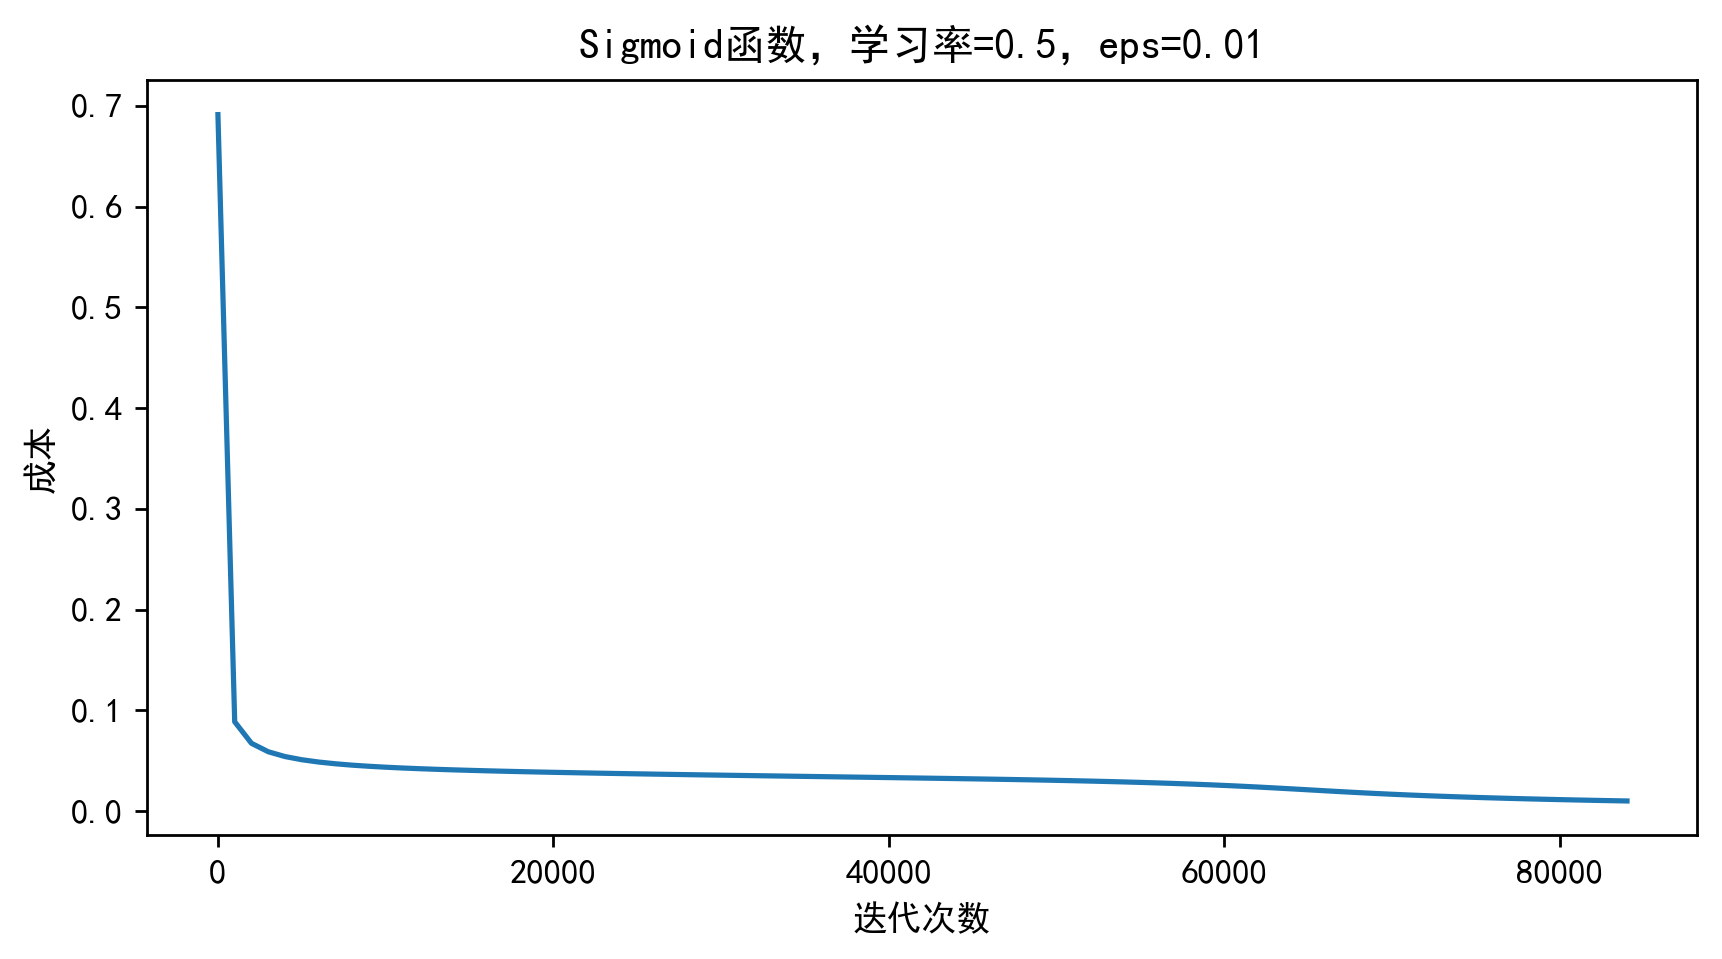

In [122]:
plt.figure(figsize=(8, 4),dpi=250)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.title('Sigmoid函数，学习率=0.5，eps=0.01')
plt.xlabel('迭代次数')
plt.ylabel('成本')
plt.plot(np.linspace(0,84000,85), costs[:])#,'b-')#,np.linspace(0,17000,17), costs[:-1],'g.')
# plt.scatter(np.linspace(0,84000,84), costs[:-1], marker='o',c='b')
plt.savefig('cost_Sigmoid.pdf')
plt.show()

==================== Sigmoid为激活函数的30x60x1的BP神经网络运行完毕 ====================

# 探索
- 当改变激活函数时会发生什么？

收敛速度会不会提高？

## 改变激活函数

常见的其他三种常见的激活函数有:

1)双曲正切tanh()函数，其表达式及导数为$$\begin{aligned}
&f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}},\\&f'(x)=1-f^2(x)\end{aligned}$$
<img style="float: left;" src="tanh.jpg">

2)ReLU()函数(Rectified Linear Unit)：其表达式及导数为

$$\begin{aligned}
&f(x)=max(0,x),\\&f'(x)=\begin{cases}0, \text{if x$\le$ 0}\\1, \text{otherwise}\end{cases}\end{aligned}$$
<img style="float: left;" src="ReLU.jpg">

3)Leaky ReLU()函数：其表达式及导数为

$$\begin{aligned}
&f(x)=max(0.01x,x),\\&f'(x)=\begin{cases}0.01, \text{if x$\le$ 0}\\1, \text{otherwise}\end{cases}\end{aligned}$$
<img style="float: left;" src="Leaky ReLU.jpg">

### 使用双曲正切函数tanh()作为激活函数

In [58]:
def forward_propagation_tanh( X , parameters ):
    """
    参数：
        X - 维度为（n_x,m）的输入数据。
        parameters - 初始化函数（initialize_parameters）的输出
        
    返回：
        A2 - 使用sigmoid()函数计算的第二次激活后的数值
        cache - 包含"Z1"，“A1”，“Z2”和“A2”的字典类型变量
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #前向传播计算A2
    Z1 = np.dot(W1 , X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2 , A1) + b2
    A2 = sigmoid(Z2)
#     print('A2.shape:{},X.shape[1]:{}'.format(A2.shape, X.shape[1]))
    #使用断言确保我的数据格式是正确的
    assert(A2.shape == (1,X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return (A2, cache)

def backward_propagation_tanh(parameters , cache , X , Y):
    """
    参数：
     parameters - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（2，数量）
     Y - “True”标签，维度为（1，数量）

    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """
    
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2 , A1.T)
    db2 = (1 / m) * np.sum(dZ2 , axis = 1 , keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T , dZ2), 1 - np.power(A1 , 2))
    dW1 = (1 / m) * np.dot(dZ1 , X.T)
    db1 = (1 / m) * np.sum(dZ1 , axis = 1 , keepdims = True)
    grads = {"dW1" : dW1,
             "db1" : db1,
             "dW2" : dW2,
             "db2" : db2}
    
    return grads

def nn_model_tanh(X,Y,n_h,num_iterations,print_cost=False, eps = 0.01, l=0.5):
    """
    参数：
        X - 数据集,维度为（30，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    
    np.random.seed(5) #指定随机种子
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
#     print('n_x:{}, n_y:{}'.format(n_x, n_y))
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs=[]
#     for i in range(num_iterations):
#         A2 , cache = forward_propagation_tanh(X,parameters)
#         cost = compute_cost(A2,Y,parameters)
#         grads = backward_propagation_tanh(parameters,cache,X,Y)
#         parameters = update_parameters(parameters,grads,learning_rate=l)
        
#         if print_cost:
#             if i%1000 == 0:
#                 print("第 ", i ," 次循环，成本为：" + str(cost))
#                 costs.append(cost)
#         if cost < eps: 
#             print("第 ", i ," 次循环，成本为：" + str(cost))
#             print('递归结束！')
#             break
            
    data=open("tanh_Results.txt",'w+') 
    print('================ tanh函数，P={}的BP网络运算结果 ================'.format(n_h)+'\n',file=data)
    for i in range(num_iterations):
        A2 , cache = forward_propagation_tanh(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation_tanh(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads,learning_rate=l)
        if print_cost:
            if i%1000 == 0:
                print("第"+str(i)+"次循环，成本为："+str(cost) ,file=data)
                print("第 ", i ," 次循环，成本为：" + str(cost))
                costs.append(cost)
        if cost < eps: 
            print("第 ", i ," 次循环，成本为：" + str(cost))
            print("第"+str(i)+"次循环，成本为："+str(cost),file=data)
            print('递归结束！')
            print('递归结束！',file=data)
            break
    data.close()
            
    return parameters, costs

def predict_tanh(parameters,X):
    """
    
    使用学习的参数，为X中的每个示例预测一个类

    参数：
        parameters - 包含参数的字典类型的变量。
        X - 输入数据（n_x，m）

    返回
        predictions - 我们模型预测的向量（红色：0 /蓝色：1）

    """
    
    A2 , cache = forward_propagation_tanh(X,parameters)
#     print(A2)
    predictions = np.round(A2)
    
    return predictions

In [59]:
parameters_tanh, costs_tanh = nn_model_tanh(train_set_X, train_set_Y, n_h = 60, num_iterations=200000, print_cost=True, eps=0.01, l=0.5)

第  0  次循环，成本为：0.6931074502249075
第  1000  次循环，成本为：0.05270665914505259
第  2000  次循环，成本为：0.044616048378593044
第  3000  次循环，成本为：0.04133888670849919
第  4000  次循环，成本为：0.039375802810630814
第  5000  次循环，成本为：0.03822782426292341


E:\Anaconda3\install\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
E:\Anaconda3\install\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


第  6000  次循环，成本为：0.03977225461655463
第  7000  次循环，成本为：0.03645865993622313
第  8000  次循环，成本为：0.03459132114919302
第  9000  次循环，成本为：0.03272888344850357
第  10000  次循环，成本为：0.030413460295596738
第  11000  次循环，成本为：0.02761554429983034
第  12000  次循环，成本为：0.024458597317391452
第  13000  次循环，成本为：0.021157656560528808
第  14000  次循环，成本为：0.018004503396309917
第  15000  次循环，成本为：0.015283267522511721
第  16000  次循环，成本为：0.013081962242937418
第  17000  次循环，成本为：0.011337055751593673
第  17958  次循环，成本为：0.00999990490947148
递归结束！


In [27]:
predictions_tanh_train = predict_tanh(parameters_tanh, train_set_X)
print ('训练集准确率: %d' % float((np.dot(np.squeeze(train_set_Y), predictions_tanh_train.T) + np.dot(1 - np.squeeze(train_set_Y), 1 - predictions_tanh_train.T)) / float(train_set_Y.size) * 100) + '%')

predictions_tanh_test = predict_tanh(parameters_tanh, test_set_X)
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), predictions_tanh_test.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - predictions_tanh_test.T)) / float(test_set_Y.size) * 100) + '%')

训练集准确率: 100%
测试集准确率: 95%


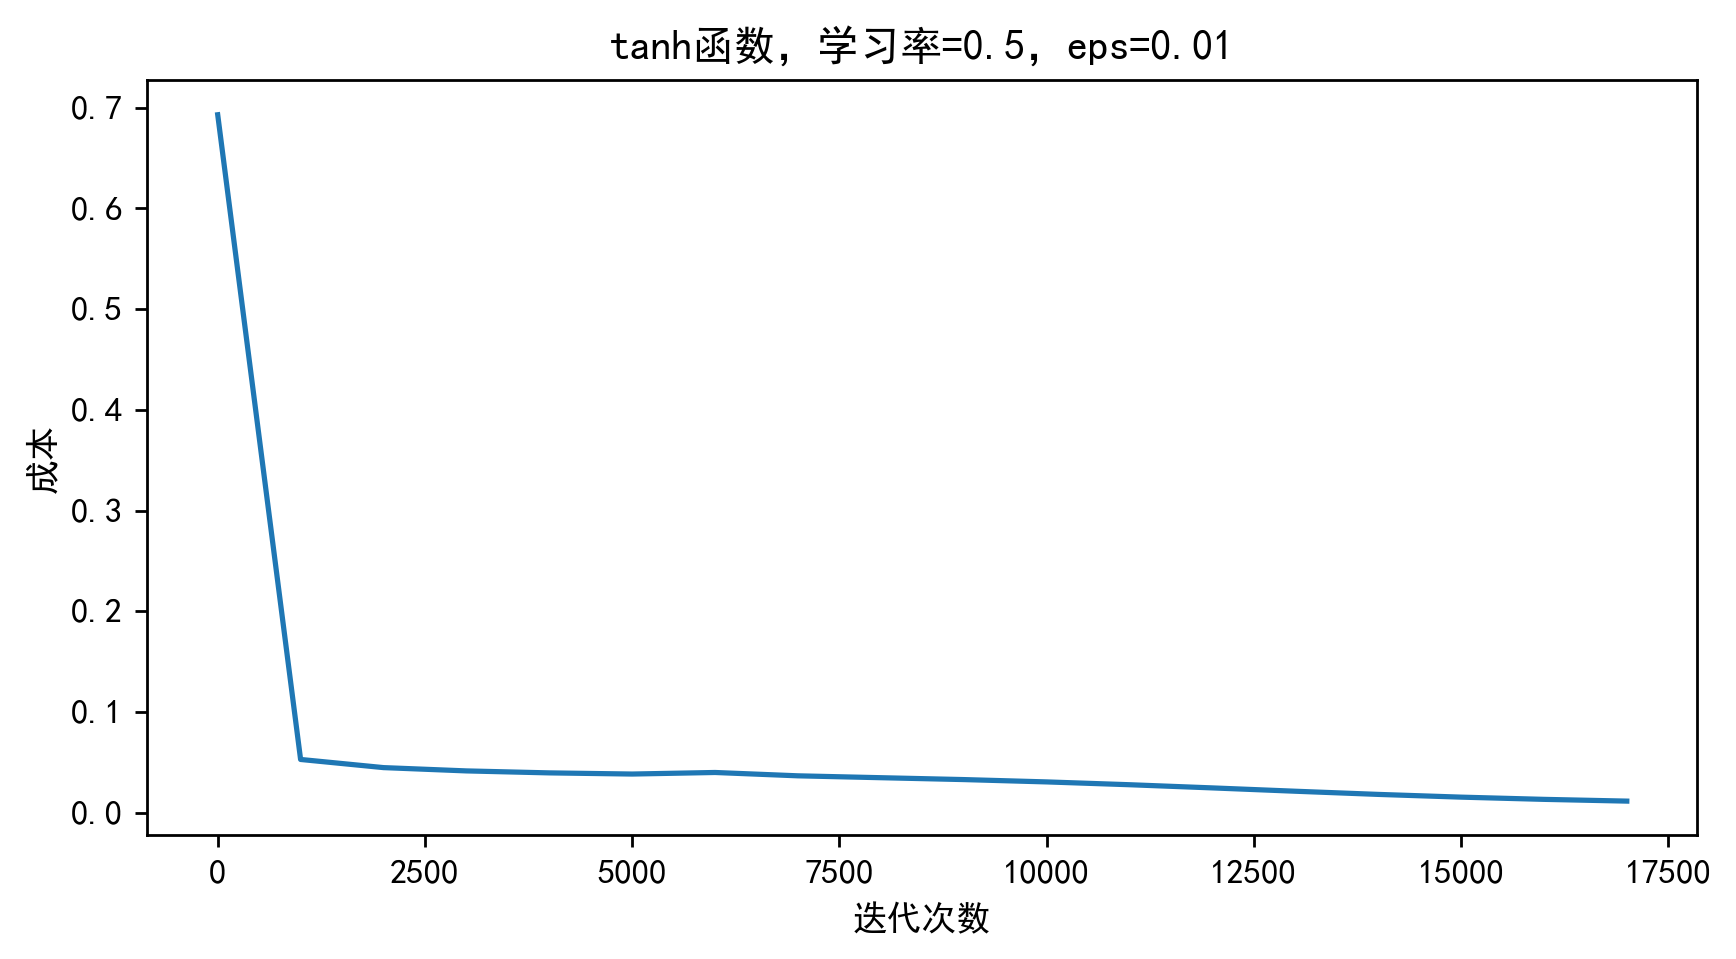

In [28]:
plt.figure(figsize=(8,4),dpi=250)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.title('tanh函数，学习率=0.5，eps=0.01')
plt.xlabel('迭代次数')
plt.ylabel('成本')
plt.plot(np.linspace(0,17000,18), costs_tanh[:])#,'b-')#,np.linspace(0,17000,17), costs[:-1],'g.')
# plt.scatter(np.linspace(0,84000,84), costs[:-1], marker='o',c='b')
plt.savefig('cost_tanh.pdf')
plt.show()

### 使用修正线性单元ReLU()函数作为激活函数

In [26]:
def ReLU(x):    
    return (abs(x) + x) / 2

def ReLU_deriv(x):
#     x[x <= 0] = 0
#     x[x > 0] = 1
    return x>0 #不要使用值传递，应该使用引用传递

In [60]:
def forward_propagation_ReLU( X , parameters ):
    """
    参数：
        X - 维度为（n_x,m）的输入数据。
        parameters - 初始化函数（initialize_parameters）的输出
        
    返回：
        A2 - 使用sigmoid()函数计算的第二次激活后的数值
        cache - 包含"Z1"，“A1”，“Z2”和“A2”的字典类型变量
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #前向传播计算A2
    Z1 = np.dot(W1 , X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2 , A1) + b2
    A2 = sigmoid(Z2)
#     print('A2.shape:{},X.shape[1]:{}'.format(A2.shape, X.shape[1]))
    #使用断言确保我的数据格式是正确的
    assert(A2.shape == (1,X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return (A2, cache)

def backward_propagation_ReLU(parameters , cache , X , Y):
    """
    参数：
     parameters - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（2，数量）
     Y - “True”标签，维度为（1，数量）

    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """
    
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2 , A1.T)
    db2 = (1 / m) * np.sum(dZ2 , axis = 1 , keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T , dZ2), ReLU_deriv(A1))
    dW1 = (1 / m) * np.dot(dZ1 , X.T)
    db1 = (1 / m) * np.sum(dZ1 , axis = 1 , keepdims = True)
    grads = {"dW1" : dW1,
             "db1" : db1,
             "dW2" : dW2,
             "db2" : db2}
    
    return grads

def nn_model_ReLU(X,Y,n_h,num_iterations,print_cost=False, eps = 0.01, l=0.5):
    """
    参数：
        X - 数据集,维度为（2，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    
    np.random.seed(5) #指定随机种子
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
#     print('n_x:{}, n_y:{}'.format(n_x, n_y))
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs=[]
#     for i in range(num_iterations):
#         A2 , cache = forward_propagation_ReLU(X,parameters)
#         cost = compute_cost(A2,Y,parameters)
#         grads = backward_propagation_ReLU(parameters,cache,X,Y)
#         parameters = update_parameters(parameters,grads,learning_rate=l)
        
#         if print_cost:
#             if i%1000 == 0:
#                 print("第 ", i ," 次循环，成本为：" + str(cost))
#                 costs.append(cost)
#         if cost < eps: 
#             print("第 ", i ," 次循环，成本为：" + str(cost))
#             print('递归结束！')
#             break
            
    data=open("ReLU_Results.txt",'w+') 
    print('================ ReLU函数，P={}的BP网络运算结果 ================'.format(n_h)+'\n',file=data)
    for i in range(num_iterations):
        A2 , cache = forward_propagation_ReLU(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation_ReLU(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads,learning_rate=l)
        if i%1000 == 0:
            print("第"+str(i)+"次循环，成本为："+str(cost),file=data)
            print("第 ", i ," 次循环，成本为：" + str(cost))
            costs.append(cost)
        if cost < eps: 
            print("第 ", i ," 次循环，成本为：" + str(cost))
            print("第"+str(i)+"次循环，成本为："+str(cost) ,file=data)
            print('递归结束！')
            print('递归结束！',file=data)
            break
    data.close()
    
    return parameters, costs

def predict_ReLU(parameters,X):
    """
    
    使用学习的参数，为X中的每个示例预测一个类

    参数：
        parameters - 包含参数的字典类型的变量。
        X - 输入数据（n_x，m）

    返回
        predictions - 我们模型预测的向量（红色：0 /蓝色：1）

    """
    
    A2 , cache = forward_propagation_ReLU(X,parameters)
#     print(A2)
    predictions = np.round(A2)
    
    return predictions

In [61]:
parameters_ReLU, costs_ReLU = nn_model_ReLU(train_set_X, train_set_Y, n_h = 60, num_iterations=200000, print_cost=True, eps=0.01, l=0.5)

第  0  次循环，成本为：0.6931074480422993
第  1000  次循环，成本为：0.05295838729259462
第  2000  次循环，成本为：0.04478297645354917
第  3000  次循环，成本为：0.04149922751929538
第  4000  次循环，成本为：0.037704094209198735
第  5000  次循环，成本为：0.031025981405798778
第  6000  次循环，成本为：0.027263145986498306
第  7000  次循环，成本为：0.023987533226278134
第  8000  次循环，成本为：0.021029028880303252
第  9000  次循环，成本为：0.018509789475448485
第  10000  次循环，成本为：0.016615493632349064
第  11000  次循环，成本为：0.015032920557305453
第  12000  次循环，成本为：0.013626373898632384
第  13000  次循环，成本为：0.012492272405646241
第  14000  次循环，成本为：0.01133935880183332
第  15000  次循环，成本为：0.010304083447616142
第  15295  次循环，成本为：0.009995606873338427
递归结束！


In [128]:
predictions_ReLU_train = predict_ReLU(parameters_ReLU, train_set_X)
print ('训练集准确率: %d' % float((np.dot(np.squeeze(train_set_Y), predictions_ReLU_train.T) + np.dot(1 - np.squeeze(train_set_Y), 1 - predictions_ReLU_train.T)) / float(train_set_Y.size) * 100) + '%')

predictions_ReLU_test = predict_ReLU(parameters_ReLU, test_set_X)
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), predictions_ReLU_test.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - predictions_ReLU_test.T)) / float(test_set_Y.size) * 100) + '%')

训练集准确率: 99%
测试集准确率: 96%


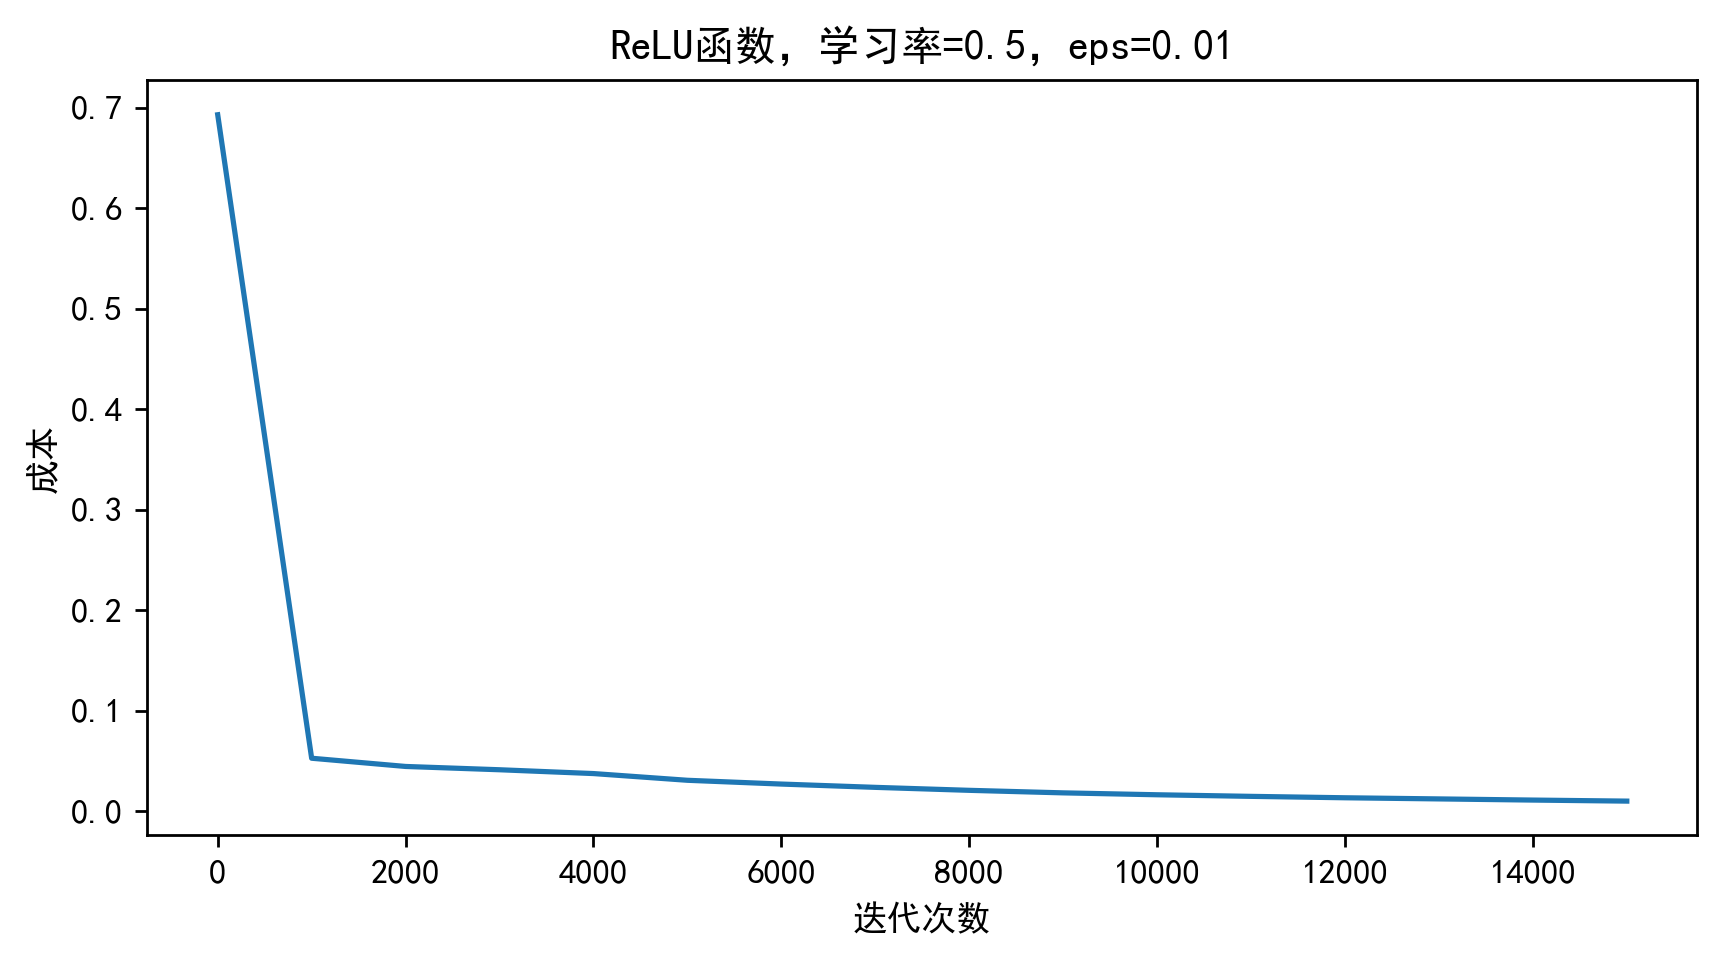

In [41]:
plt.figure(figsize=(8,4),dpi=250)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.title('ReLU函数，学习率=0.5，eps=0.01')
plt.xlabel('迭代次数')
plt.ylabel('成本')
plt.plot(np.linspace(0,15000,16), costs_ReLU[:])#,'b-')#,np.linspace(0,17000,17), costs[:-1],'g.')
# plt.scatter(np.linspace(0,84000,84), costs[:-1], marker='o',c='b')
plt.savefig('cost_ReLU.pdf')
plt.show()

### 使用带泄露的修正线性单元Leaky ReLU()函数作为激活函数

In [28]:
def Leaky_ReLU(x, a=0.01): 
    
    X = x.copy()
    X[X <=0 ] = a * x[X <= 0]    
    
    return X

def Leaky_ReLU_deriv(x, a=0.01):
    
    X = x.copy()
    X[X > 0] = 1
    X[X <= 0] = a
    
    return X #不要使用值传递，应该使用引用传递

In [62]:
def forward_propagation_LeakyReLU( X , parameters ):
    """
    参数：
        X - 维度为（n_x,m）的输入数据。
        parameters - 初始化函数（initialize_parameters）的输出
        
    返回：
        A2 - 使用sigmoid()函数计算的第二次激活后的数值
        cache - 包含"Z1"，“A1”，“Z2”和“A2”的字典类型变量
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #前向传播计算A2
    Z1 = np.dot(W1 , X) + b1
    A1 = Leaky_ReLU(Z1)
    Z2 = np.dot(W2 , A1) + b2
    A2 = sigmoid(Z2)
#     print('A2.shape:{},X.shape[1]:{}'.format(A2.shape, X.shape[1]))
    #使用断言确保我的数据格式是正确的
    assert(A2.shape == (1,X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return (A2, cache)

def backward_propagation_LeakyReLU(parameters , cache , X , Y):
    """
    参数：
     parameters - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（2，数量）
     Y - “True”标签，维度为（1，数量）

    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """
    
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2 , A1.T)
    db2 = (1 / m) * np.sum(dZ2 , axis = 1 , keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T , dZ2), Leaky_ReLU_deriv(A1))
    dW1 = (1 / m) * np.dot(dZ1 , X.T)
    db1 = (1 / m) * np.sum(dZ1 , axis = 1 , keepdims = True)
    grads = {"dW1" : dW1,
             "db1" : db1,
             "dW2" : dW2,
             "db2" : db2}
    
    return grads

def nn_model_LeakyReLU(X,Y,n_h,num_iterations,print_cost=False, eps = 0.01, l=0.5):
    """
    参数：
        X - 数据集,维度为（2，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    
    np.random.seed(5) #指定随机种子
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
#     print('n_x:{}, n_y:{}'.format(n_x, n_y))
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs=[]
#     for i in range(num_iterations):
#         A2 , cache = forward_propagation_LeakyReLU(X,parameters)
#         cost = compute_cost(A2,Y,parameters)
#         grads = backward_propagation_LeakyReLU(parameters,cache,X,Y)
#         parameters = update_parameters(parameters,grads,learning_rate=l)
        
#         if print_cost:
#             if i%1000 == 0:
#                 print("第 ", i ," 次循环，成本为：" + str(cost))
#                 costs.append(cost)
#         if cost < eps: 
#             print("第 ", i ," 次循环，成本为：" + str(cost))
#             print('递归结束！')
#             break
            
    data=open("LeakyReLU_Results.txt",'w+') 
    print('================ Leaky_ReLU函数，P={}的BP网络运算结果 ================'.format(n_h)+'\n',file=data)
    for i in range(num_iterations):
        A2 , cache = forward_propagation_LeakyReLU(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation_LeakyReLU(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads,learning_rate=l)
        if i%1000 == 0:
            print("第"+str(i)+"次循环，成本为："+str(cost) ,file=data)
            print("第 ", i ," 次循环，成本为：" + str(cost))
            costs.append(cost)
        if cost < eps: 
            print("第 ", i ," 次循环，成本为：" + str(cost))
            print("第"+str(i)+"次循环，成本为："+str(cost),file=data)
            print('递归结束！')
            print('递归结束！',file=data)
            break
    data.close()
            
    return parameters, costs

def predict_LeakyReLU(parameters,X):
    """
    
    使用学习的参数，为X中的每个示例预测一个类

    参数：
        parameters - 包含参数的字典类型的变量。
        X - 输入数据（n_x，m）

    返回
        predictions - 我们模型预测的向量（红色：0 /蓝色：1）

    """
    
    A2 , cache = forward_propagation_LeakyReLU(X,parameters)
#     print(A2)
    predictions = np.round(A2)
    
    return predictions

In [63]:
parameters_LeakyReLU, costs_LeakyReLU = nn_model_LeakyReLU(train_set_X, train_set_Y, n_h = 60, num_iterations=200000, print_cost=True, eps=0.01, l=0.5)

第  0  次循环，成本为：0.6931074467282935
第  1000  次循环，成本为：0.05295829230767048
第  2000  次循环，成本为：0.044783034783064266
第  3000  次循环，成本为：0.0414993879760131
第  4000  次循环，成本为：0.06633698230708121
第  5000  次循环，成本为：0.04048388822554928
第  6000  次循环，成本为：0.03436729342071627
第  7000  次循环，成本为：0.029142787628991473
第  8000  次循环，成本为：0.02410987726470541
第  9000  次循环，成本为：0.02039630053747419
第  10000  次循环，成本为：0.015972967479942774
第  11000  次循环，成本为：0.013413458856527477
第  12000  次循环，成本为：0.01152492949546787
第  13000  次循环，成本为：0.010074251783633359
第  13059  次循环，成本为：0.009998904978613119
递归结束！


In [133]:
predictions_LeakyReLU_train = predict_LeakyReLU(parameters_LeakyReLU, train_set_X)
print ('训练集准确率: %d' % float((np.dot(np.squeeze(train_set_Y), predictions_LeakyReLU_train.T) + np.dot(1 - np.squeeze(train_set_Y), 1 - predictions_LeakyReLU_train.T)) / float(train_set_Y.size) * 100) + '%')

predictions_LeakyReLU_test = predict_LeakyReLU(parameters_LeakyReLU, test_set_X)
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), predictions_LeakyReLU_test.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - predictions_LeakyReLU_test.T)) / float(test_set_Y.size) * 100) + '%')

训练集准确率: 100%
测试集准确率: 95%


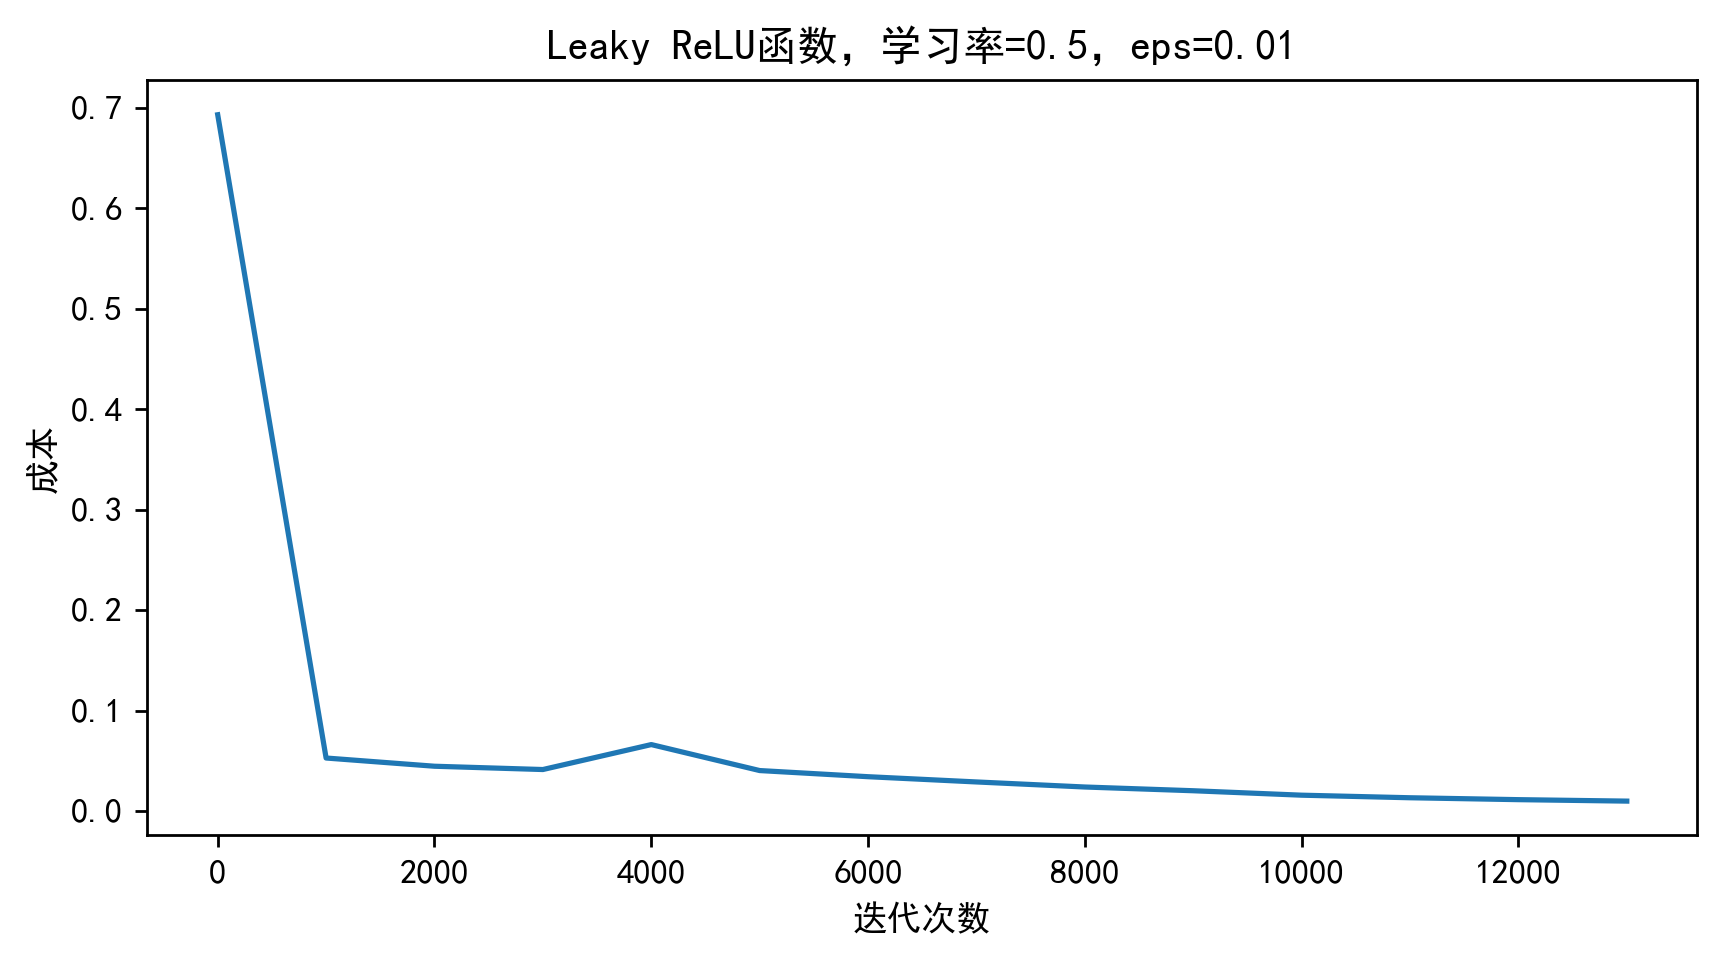

In [33]:
plt.figure(figsize=(8,4),dpi=250)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.title('Leaky ReLU函数，学习率=0.5，eps=0.01')
plt.xlabel('迭代次数')
plt.ylabel('成本')
plt.plot(np.linspace(0,13000,14), costs_LeakyReLU[:])#,'b-')#,np.linspace(0,17000,17), costs[:-1],'g.')
# plt.scatter(np.linspace(0,84000,84), costs[:-1], marker='o',c='b')
plt.savefig('cost_LeakyReLU.pdf')
plt.show()

可以看出收敛的速度Leaky ReLU和RuLU最快、tanh次之、sigmoid最慢

## 改变隐藏层节点数量对算法收敛速度及模型预测准确率的影响

- 改变隐藏层的数量呢？
输入、输出层自不必说，根据样本的数据可以推出，而对于隐含层的神经元数量设计十分迷惑，网上找了一些资料，算是有了一些了解。

###方法一：
fangfaGorman指出隐层结点数s与模式数N的关系是：s＝log2N；

###方法二：
Kolmogorov定理表明，隐层结点数s＝2n＋1（n为输入层结点数）；

A.N.Kolmogorov,"On the Representation of Continuous Functions of Many Variables by Superposition of Continuous Functions of One Variable and Addition", Dokl. Akad. Nauk USSR, 114, 953-956, 1957.

###方法三：
s＝sqrt（0.43mn＋0.12nn＋2.54m＋0.77n＋0.35）＋0.51（m是输入层的个数，n是输出层的个数）；

###方法四：
$N_h=\frac{N_s}{c(N_x+N_y)}$，$N_s$为样本数量，$N_h$为隐层节点数，$N_x, N_y$为输入输出层节点数，$c$取1-10的整数；

###其他方法：

<img style="float: left;" src="other.png">

以Leaky ReLU为例

In [30]:
import time

In [31]:
def layer_sizes_difN_h(X , Y):
    """
    参数：
    X - 输入数据集，维度为（输入的数量，训练/测试的数量）
    Y - 标签，维度为（输出的数量，训练/测试的数量）
    
    返回：
    n_x - 输入层的数量
    n_h - 隐藏层的数量
    n_y - 输出层的数量
    """
    
    n_x = X.shape[0] #输入层
    n_h = 60 #隐藏层，硬编码为60
    n_y = Y.shape[0] #输出层
    
#     print('n_x:{},n_h:{},n_y:{}'.format(n_x , n_h , n_y))
    return (n_x , n_h , n_y)

In [48]:
def nn_model_LeakyReLU_difN_h(X,Y,n_h,num_iterations,print_cost=False, eps = 0.01, l=0.5):
    """
    参数：
        X - 数据集,维度为（2，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    
    np.random.seed(5) #指定随机种子
    n_x = layer_sizes(X,Y)[0]
#     n_h = layer_sizes_difN_h(X,Y)[1]
    n_y = layer_sizes(X,Y)[2]
#     print('n_x:{}, n_y:{}'.format(n_x, n_y))
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs=[]
    end=0
    for i in range(num_iterations):
        A2 , cache = forward_propagation_LeakyReLU(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation_LeakyReLU(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads,learning_rate=l)
        
        if print_cost:
            if i%1000 == 0:
#                 print("第 ", i ," 次循环，成本为：" + str(cost))
                costs.append(cost)
        if cost <= eps: 
            print("第 ", i ," 次循环，成本为：" + str(cost))
            end = i
            costs.append(cost)
            print('递归结束！')
            print('递归结束！',file=data)
            break
        elif i >= num_iterations-1:
            print("第 ", i ," 次循环，成本为：" + str(cost))
            end = num_iterations
            print('在规定递归次数内成本未收敛至eps内，请检查梯度是否消失。')
            print('在规定递归次数内成本未收敛至eps内，请检查梯度是否消失。',file=data)
            
            
    return parameters, costs, end

In [33]:
def Kolmogorov(n_x):
    return int(2*n_x+1)

def Hidnum3(n_x, n_y):
    return int((np.sqrt(0.43*n_x*n_y+0.12*n_y**2+2.54*n_x+0.77*n_y+0.35)+0.51)+0.5)

def Hidnum4(n_s, n_x, n_y, c=1):
    return int(n_s/c/(n_x+n_y)+0.5)

def Hidnum5(n_x, n_y, alp=1):
    return int(np.sqrt(n_x+n_y)+alp+0.5)

def Hidnum6(n_x, n_y):
    return int(np.sqrt(n_x*n_y)+0.5)

In [49]:
n_x, n_y, n_s = train_set_X.shape[0], train_set_Y.shape[0], train_set_X.shape[1]
print(n_x, n_y, n_s)
n1, n2, n3, n4, n5 = Kolmogorov(n_x), Hidnum3(n_x, n_y), Hidnum4(n_s, n_x, n_y, c=1), Hidnum5(n_x, n_y, alp=1), Hidnum6(n_x, n_y)
HLNUM = [n1, n2, n3, n4, n5]
print(HLNUM)

30 1 455
[61, 10, 15, 7, 5]


In [58]:
np.log2(30)

4.906890595608519

In [55]:
HLNUM.sort()

In [34]:
HLNUM = [2,3,4,5,10,15,20,30,40,50,61,80,100]

In [35]:
def difHiddenLayerNum(HidLayerNum, eps, l=0.5):

    DH_params = []
    DH_costs = []
    times = []
    itrs = []
    tic = time.time()
    data=open("difHidden.txt",'w+') 
    for i in range(len(HidLayerNum)):

        parameters_LeakyReLU, costs_LeakyReLU, End_i = nn_model_LeakyReLU_difN_h(train_set_X, train_set_Y, n_h = HidLayerNum[i], 
                                                                                 num_iterations=200000, print_cost=True, eps=eps, l=l)
        toc = time.time()
        run_time = np.round(toc-tic, 2)
        times.append(run_time)
        tic = toc
        itrs.append(End_i)
        DH_params.append(parameters_LeakyReLU)
        DH_costs.append(costs_LeakyReLU)
        print('================ 隐藏层数为{}的BP网络运算结果 ================'.format(HidLayerNum[i])+'\n',file=data)
        print('eps: {}，学习率：{}，运算时间: {}s，迭代次数: {}'.format(eps,l,run_time,End_i)+'\n',file=data)#.format(datum, eps, run_time, End_i))
        print('W1.shape: {}'.format(parameters_LeakyReLU['W1'].shape),file=data)
        print('W1: ',file=data)
        print(str(parameters_LeakyReLU['W1'])+'\n',file=data)
        print('b1.shape: {}'.format(parameters_LeakyReLU['b1'].shape),file=data)
        print('b1: ',file=data)
        print(str(parameters_LeakyReLU['b1'])+'\n',file=data) 
        print('W2.shape: {}'.format(parameters_LeakyReLU['W2'].shape),file=data)
        print('W2: ',file=data)
        print(str(parameters_LeakyReLU['W2'])+'\n',file=data)
        print('b2.shape: {}'.format(parameters_LeakyReLU['b2'].shape),file=data)
        print('b2: ',file=data)
        print(str(parameters_LeakyReLU['b2']),file=data) 
        print('成本:',file=data)
        print(str(costs_LeakyReLU)+'\n',file=data)
        
    data.close()
    
    return DH_params, DH_costs, times, itrs

In [65]:
print('===== test difHiddenLayerNum =====')
DH_params, DH_costs, times, iters= difHiddenLayerNum(HLNUM, 0.5,0.5)

===== test difHiddenLayerNum =====
第  160  次循环，成本为：0.4938141191785019
递归结束！
第  133  次循环，成本为：0.49396916273884556
递归结束！
第  136  次循环，成本为：0.4947832423583817
递归结束！
第  69  次循环，成本为：0.49655463890508883
递归结束！
第  77  次循环，成本为：0.4945720851574903
递归结束！
第  64  次循环，成本为：0.4989266290837172
递归结束！
第  64  次循环，成本为：0.4910475021932587
递归结束！
第  64  次循环，成本为：0.4941328595748778
递归结束！
第  60  次循环，成本为：0.49329757176738703
递归结束！
第  56  次循环，成本为：0.4927141464945084
递归结束！
第  58  次循环，成本为：0.49462004398501364
递归结束！
第  53  次循环，成本为：0.494311614084665
递归结束！
第  50  次循环，成本为：0.4910799553392064
递归结束！


In [36]:
def DH_predict_LeakyReLU(HidLayerNum, Params):
    
    train_precise = []
    test_precise = []
    data=open("preDH.txt",'w+') 
    for i in range(len(Params)):
        print(i)
        pre_DHLeakyReLU_train = predict_LeakyReLU(Params[i], train_set_X)
        train_prec = float((np.dot(np.squeeze(train_set_Y), pre_DHLeakyReLU_train.T) + 
                            np.dot(1 - np.squeeze(train_set_Y), 1 - pre_DHLeakyReLU_train.T)) / float(train_set_Y.size) * 100)
        train_precise.append(train_prec)
        print ('训练集准确率: %d' % train_prec + '%')
        pre_DHLeakyReLU_test = predict_LeakyReLU(Params[i], test_set_X)
        test_prec = float((np.dot(np.squeeze(test_set_Y), pre_DHLeakyReLU_test.T) + 
                           np.dot(1 - np.squeeze(test_set_Y), 1 - pre_DHLeakyReLU_test.T)) / float(test_set_Y.size) * 100)
        
        test_precise.append(train_prec)
        print ('测试集准确率: %d' % test_prec + '%')
        
        print('================ 隐藏层数为{}的BP网络预测准确率 ================'.format(HidLayerNum[i])+'\n',file=data)
        print('训练集准确率: {}%'.format(train_prec),file=data)#.format(datum, eps, run_time, End_i))
        print('测试集准确率: {}%'.format(test_prec)+'\n',file=data)

    return train_precise, test_precise

In [67]:
len(DH_params)

13

In [72]:
print('===== test DH_predict_LeakyReLU =====')
train_prec, test_prec = DH_predict_LeakyReLU(HLNUM, DH_params)
train_prec, test_prec

===== test DH_predict_LeakyReLU =====
0
训练集准确率: 73%
测试集准确率: 71%
1
训练集准确率: 72%
测试集准确率: 69%
2
训练集准确率: 67%
测试集准确率: 65%
3
训练集准确率: 89%
测试集准确率: 92%
4
训练集准确率: 89%
测试集准确率: 92%
5
训练集准确率: 89%
测试集准确率: 92%
6
训练集准确率: 89%
测试集准确率: 92%
7
训练集准确率: 89%
测试集准确率: 92%
8
训练集准确率: 89%
测试集准确率: 92%
9
训练集准确率: 89%
测试集准确率: 92%
10
训练集准确率: 89%
测试集准确率: 92%
11
训练集准确率: 89%
测试集准确率: 92%
12
训练集准确率: 89%
测试集准确率: 92%


([73.18681318681318,
  72.3076923076923,
  67.03296703296702,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901,
  89.23076923076924,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901],
 [73.18681318681318,
  72.3076923076923,
  67.03296703296702,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901,
  89.23076923076924,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901,
  89.01098901098901])

## 改变学习率对算法收敛速度的影响

- 改变learning_rate的数值会发生什么

以Leaky ReLU函数为例，设置不同的learning rate运行BP神经网络。

In [37]:
lr = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0]

一般按3倍的倍率设置学习率，超参数设置参考

*.https://mooc.study.163.com/learn/2001281002?tid=2403023003&_trace_c_p_k2_=acedee28208d442d9c3e505ce19e1a6e#/learn/content?type=detail&id=2403362521

In [49]:
def nn_model_LeakyReLU_multi(X,Y,n_h,num_iterations,print_cost=False, eps = 0.01, l=0.5):
    """
    参数：
        X - 数据集,维度为（30，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    
    np.random.seed(5) #指定随机种子
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
#     print('n_x:{}, n_y:{}'.format(n_x, n_y))
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs=[]
    end=0
    for i in range(num_iterations):
        A2 , cache = forward_propagation_LeakyReLU(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation_LeakyReLU(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads,learning_rate=l)
        
        if print_cost:
            if i%1000 == 0:
                print("第 ", i ," 次循环，成本为：" + str(cost))
                costs.append(cost)
        if cost <= eps: 
            print("第 ", i ," 次循环，成本为：" + str(cost))
            end = i
            print('递归结束！')
            print('递归结束！',file=data)
            break
        elif i >= num_iterations-1:
            print("第 ", i ," 次循环，成本为：" + str(cost))
            end = num_iterations
            print('在规定递归次数内成本未收敛至eps内，请检查梯度是否消失。')
            print('在规定递归次数内成本未收敛至eps内，请检查梯度是否消失。',file=data)
            
            
    return parameters, costs, end

In [39]:
def run_lr_BPNN(lr):
    
    parameters_LeakyReLU, costs_LeakyReLU, end_i = nn_model_LeakyReLU_multi(train_set_X, train_set_Y, n_h = 60, num_iterations=200000, print_cost=True, eps=0.01, l=lr)
    
    return parameters_LeakyReLU, costs_LeakyReLU, end_i

def difLearningRate(LR, eps):

    LR_params = []
    LR_costs = []
    times = []
    itrs = []
    tic = time.time()
    for datum in LR:

        parameters_LeakyReLU, costs_LeakyReLU, End_i = nn_model_LeakyReLU_multi(train_set_X, train_set_Y, n_h = 60, num_iterations=200000, print_cost=True, eps=eps, l=datum)
        toc = time.time()
        run_time = np.round(toc-tic, 2)
        times.append(run_time)
        tic = toc
        itrs.append(End_i)
        print('学习率：{}，eps:{}，运算时间：{}s，迭代次数：{}'.format(datum, eps, run_time, End_i))
        LR_params.append(parameters_LeakyReLU)
        LR_costs.append(costs_LeakyReLU)
    
    return LR_params, LR_costs, times, itrs

In [51]:
## 谨慎运行
eps_01 = difLearningRate(lr, 0.01)

第  0  次循环，成本为：0.6931074467282935
第  1000  次循环，成本为：0.680500635946799
第  2000  次循环，成本为：0.672833740684204
第  3000  次循环，成本为：0.6681332745011037
第  4000  次循环，成本为：0.6652040878436887
第  5000  次循环，成本为：0.6633255255371115
第  6000  次循环，成本为：0.6620726242943175
第  7000  次循环，成本为：0.6611651576108993
第  8000  次循环，成本为：0.6604232006047348
第  9000  次循环，成本为：0.6597137149539142
第  10000  次循环，成本为：0.658927340934399
第  11000  次循环，成本为：0.6579615142800518
第  12000  次循环，成本为：0.6566995843935124
第  13000  次循环，成本为：0.655004849341015
第  14000  次循环，成本为：0.6527155281560006
第  15000  次循环，成本为：0.649647349717939
第  16000  次循环，成本为：0.6456017583446717
第  17000  次循环，成本为：0.6403868886050756
第  18000  次循环，成本为：0.6338487681672137
第  19000  次循环，成本为：0.6258888882424573
第  20000  次循环，成本为：0.616458998867409
第  21000  次循环，成本为：0.6055333829622991
第  22000  次循环，成本为：0.5930827844459163
第  23000  次循环，成本为：0.5790734784362127
第  24000  次循环，成本为：0.5634857431108508
第  25000  次循环，成本为：0.5463451742058003
第  26000  次循环，成本为：0.527748999632806
第  27000  次循环，成本为：0.5

第  14000  次循环，成本为：0.2646352609457496
第  15000  次循环，成本为：0.23949442777390617
第  16000  次循环，成本为：0.21933801245872608
第  17000  次循环，成本为：0.20299210201591014
第  18000  次循环，成本为：0.1895388430348052
第  19000  次循环，成本为：0.17830520799035088
第  20000  次循环，成本为：0.1687912396880407
第  21000  次循环，成本为：0.16061952734574197
第  22000  次循环，成本为：0.15351355820057017
第  23000  次循环，成本为：0.1472668724951167
第  24000  次循环，成本为：0.14172390687190328
第  25000  次循环，成本为：0.13676621210526352
第  26000  次循环，成本为：0.13229918740637628
第  27000  次循环，成本为：0.12825000061952394
第  28000  次循环，成本为：0.12455729793460667
第  29000  次循环，成本为：0.1211736721819725
第  30000  次循环，成本为：0.11806146399991982
第  31000  次循环，成本为：0.11518878722463943
第  32000  次循环，成本为：0.11252832561826845
第  33000  次循环，成本为：0.110057677883029
第  34000  次循环，成本为：0.10775676732533175
第  35000  次循环，成本为：0.10560881872798254
第  36000  次循环，成本为：0.10359896066454687
第  37000  次循环，成本为：0.1017145694607939
第  38000  次循环，成本为：0.09994471959123344
第  39000  次循环，成本为：0.0982793886944972
第  40000  次循环，成本为：0.0

第  25000  次循环，成本为：0.06694757147449204
第  26000  次循环，成本为：0.06591389934417773
第  27000  次循环，成本为：0.06495269823213484
第  28000  次循环，成本为：0.0640560906768761
第  29000  次循环，成本为：0.06321730343677927
第  30000  次循环，成本为：0.06243055371565701
第  31000  次循环，成本为：0.06169090793650311
第  32000  次循环，成本为：0.060994070070422866
第  33000  次循环，成本为：0.060336302245701995
第  34000  次循环，成本为：0.059714315961441417
第  35000  次循环，成本为：0.05912520372056674
第  36000  次循环，成本为：0.05856636311985871
第  37000  次循环，成本为：0.058035472768829914
第  38000  次循环，成本为：0.05753044932494563
第  39000  次循环，成本为：0.05704936195480753
第  40000  次循环，成本为：0.05659049850610972
第  41000  次循环，成本为：0.05615228486529699
第  42000  次循环，成本为：0.055733288322831316
第  43000  次循环，成本为：0.05533220527189263
第  44000  次循环，成本为：0.05494783939302954
第  45000  次循环，成本为：0.05457909499228234
第  46000  次循环，成本为：0.05422496642880618
第  47000  次循环，成本为：0.05388453033348679
第  48000  次循环，成本为：0.05355694258653736
第  49000  次循环，成本为：0.05324141966260737
第  50000  次循环，成本为：0.052937230650058606
第  5100

第  35000  次循环，成本为：0.04433460477259147
第  36000  次循环，成本为：0.044086320726992166
第  37000  次循环，成本为：0.04384930799181107
第  38000  次循环，成本为：0.04362272127165378
第  39000  次循环，成本为：0.04340579233477824
第  40000  次循环，成本为：0.04319782292246664
第  41000  次循环，成本为：0.042998177408584685
第  42000  次循环，成本为：0.04280627723968646
第  43000  次循环，成本为：0.042621594457564416
第  44000  次循环，成本为：0.04244364931554524
第  45000  次循环，成本为：0.042272000375356694
第  46000  次循环，成本为：0.04210624515510641
第  47000  次循环，成本为：0.04194601472909771
第  48000  次循环，成本为：0.041790970519645934
第  49000  次循环，成本为：0.04164079885300413
第  50000  次循环，成本为：0.04149521409791806
第  51000  次循环，成本为：0.04135394775035276
第  52000  次循环，成本为：0.041216754364801
第  53000  次循环，成本为：0.04108340532420155
第  54000  次循环，成本为：0.04095368840058478
第  55000  次循环，成本为：0.04082740679780586
第  56000  次循环，成本为：0.040704376352443734
第  57000  次循环，成本为：0.0405844276235125
第  58000  次循环，成本为：0.040467400129541135
第  59000  次循环，成本为：0.04035314382075924
第  60000  次循环，成本为：0.04024151884108113
第  61000

第  45000  次循环，成本为：0.03414590908803185
第  46000  次循环，成本为：0.033969118000579404
第  47000  次循环，成本为：0.0337930652130481
第  48000  次循环，成本为：0.033617635625496786
第  49000  次循环，成本为：0.033442702444647344
第  50000  次循环，成本为：0.033268216607461515
第  51000  次循环，成本为：0.033094073270711115
第  52000  次循环，成本为：0.032920161635455955
第  53000  次循环，成本为：0.032746360133193174
第  54000  次循环，成本为：0.032572649588369744
第  55000  次循环，成本为：0.032398784055254294
第  56000  次循环，成本为：0.03222470421548749
第  57000  次循环，成本为：0.03205039102612687
第  58000  次循环，成本为：0.031875569732100685
第  59000  次循环，成本为：0.031700295529130014
第  60000  次循环，成本为：0.03152416864936446
第  61000  次循环，成本为：0.03134697853545497
第  62000  次循环，成本为：0.0311687367003682
第  63000  次循环，成本为：0.030989155756004822
第  64000  次循环，成本为：0.03080797053797777
第  65000  次循环，成本为：0.030624920657965005
第  66000  次循环，成本为：0.03043968809111012
第  67000  次循环，成本为：0.030251945234122786
第  68000  次循环，成本为：0.03006154414329665
第  69000  次循环，成本为：0.02986740094488764
第  70000  次循环，成本为：0.029669254120897225

In [41]:
eps_05 = difLearningRate(lr, 0.05)

第  0  次循环，成本为：0.6931074467282935
第  1000  次循环，成本为：0.680500635946799
第  2000  次循环，成本为：0.672833740684204
第  3000  次循环，成本为：0.6681332745011037
第  4000  次循环，成本为：0.6652040878436887
第  5000  次循环，成本为：0.6633255255371115
第  6000  次循环，成本为：0.6620726242943175
第  7000  次循环，成本为：0.6611651576108993
第  8000  次循环，成本为：0.6604232006047348
第  9000  次循环，成本为：0.6597137149539142
第  10000  次循环，成本为：0.658927340934399
第  11000  次循环，成本为：0.6579615142800518
第  12000  次循环，成本为：0.6566995843935124
第  13000  次循环，成本为：0.655004849341015
第  14000  次循环，成本为：0.6527155281560006
第  15000  次循环，成本为：0.649647349717939
第  16000  次循环，成本为：0.6456017583446717
第  17000  次循环，成本为：0.6403868886050756
第  18000  次循环，成本为：0.6338487681672137
第  19000  次循环，成本为：0.6258888882424573
第  20000  次循环，成本为：0.616458998867409
第  21000  次循环，成本为：0.6055333829622991
第  22000  次循环，成本为：0.5930827844459163
第  23000  次循环，成本为：0.5790734784362127
第  24000  次循环，成本为：0.5634857431108508
第  25000  次循环，成本为：0.5463451742058003
第  26000  次循环，成本为：0.527748999632806
第  27000  次循环，成本为：0.5

第  14000  次循环，成本为：0.2646352609457496
第  15000  次循环，成本为：0.23949442777390617
第  16000  次循环，成本为：0.21933801245872608
第  17000  次循环，成本为：0.20299210201591014
第  18000  次循环，成本为：0.1895388430348052
第  19000  次循环，成本为：0.17830520799035088
第  20000  次循环，成本为：0.1687912396880407
第  21000  次循环，成本为：0.16061952734574197
第  22000  次循环，成本为：0.15351355820057017
第  23000  次循环，成本为：0.1472668724951167
第  24000  次循环，成本为：0.14172390687190328
第  25000  次循环，成本为：0.13676621210526352
第  26000  次循环，成本为：0.13229918740637628
第  27000  次循环，成本为：0.12825000061952394
第  28000  次循环，成本为：0.12455729793460667
第  29000  次循环，成本为：0.1211736721819725
第  30000  次循环，成本为：0.11806146399991982
第  31000  次循环，成本为：0.11518878722463943
第  32000  次循环，成本为：0.11252832561826845
第  33000  次循环，成本为：0.110057677883029
第  34000  次循环，成本为：0.10775676732533175
第  35000  次循环，成本为：0.10560881872798254
第  36000  次循环，成本为：0.10359896066454687
第  37000  次循环，成本为：0.1017145694607939
第  38000  次循环，成本为：0.09994471959123344
第  39000  次循环，成本为：0.0982793886944972
第  40000  次循环，成本为：0.0

第  25000  次循环，成本为：0.06694757147449204
第  26000  次循环，成本为：0.06591389934417773
第  27000  次循环，成本为：0.06495269823213484
第  28000  次循环，成本为：0.0640560906768761
第  29000  次循环，成本为：0.06321730343677927
第  30000  次循环，成本为：0.06243055371565701
第  31000  次循环，成本为：0.06169090793650311
第  32000  次循环，成本为：0.060994070070422866
第  33000  次循环，成本为：0.060336302245701995
第  34000  次循环，成本为：0.059714315961441417
第  35000  次循环，成本为：0.05912520372056674
第  36000  次循环，成本为：0.05856636311985871
第  37000  次循环，成本为：0.058035472768829914
第  38000  次循环，成本为：0.05753044932494563
第  39000  次循环，成本为：0.05704936195480753
第  40000  次循环，成本为：0.05659049850610972
第  41000  次循环，成本为：0.05615228486529699
第  42000  次循环，成本为：0.055733288322831316
第  43000  次循环，成本为：0.05533220527189263
第  44000  次循环，成本为：0.05494783939302954
第  45000  次循环，成本为：0.05457909499228234
第  46000  次循环，成本为：0.05422496642880618
第  47000  次循环，成本为：0.05388453033348679
第  48000  次循环，成本为：0.05355694258653736
第  49000  次循环，成本为：0.05324141966260737
第  50000  次循环，成本为：0.052937230650058606
第  5100

In [40]:
eps_1 = difLearningRate(lr, 0.1)

第  0  次循环，成本为：0.6931074467282935
第  1000  次循环，成本为：0.680500635946799
第  2000  次循环，成本为：0.672833740684204
第  3000  次循环，成本为：0.6681332745011037
第  4000  次循环，成本为：0.6652040878436887
第  5000  次循环，成本为：0.6633255255371115
第  6000  次循环，成本为：0.6620726242943175
第  7000  次循环，成本为：0.6611651576108993
第  8000  次循环，成本为：0.6604232006047348
第  9000  次循环，成本为：0.6597137149539142
第  10000  次循环，成本为：0.658927340934399
第  11000  次循环，成本为：0.6579615142800518
第  12000  次循环，成本为：0.6566995843935124
第  13000  次循环，成本为：0.655004849341015
第  14000  次循环，成本为：0.6527155281560006
第  15000  次循环，成本为：0.649647349717939
第  16000  次循环，成本为：0.6456017583446717
第  17000  次循环，成本为：0.6403868886050756
第  18000  次循环，成本为：0.6338487681672137
第  19000  次循环，成本为：0.6258888882424573
第  20000  次循环，成本为：0.616458998867409
第  21000  次循环，成本为：0.6055333829622991
第  22000  次循环，成本为：0.5930827844459163
第  23000  次循环，成本为：0.5790734784362127
第  24000  次循环，成本为：0.5634857431108508
第  25000  次循环，成本为：0.5463451742058003
第  26000  次循环，成本为：0.527748999632806
第  27000  次循环，成本为：0.5

In [44]:
LR_costs

[[0.6931074467282935,
  0.680500635946799,
  0.672833740684204,
  0.6681332745011037,
  0.6652040878436887,
  0.6633255255371115,
  0.6620726242943175,
  0.6611651576108993,
  0.6604232006047348,
  0.6597137149539142,
  0.658927340934399,
  0.6579615142800518,
  0.6566995843935124,
  0.655004849341015,
  0.6527155281560006,
  0.649647349717939,
  0.6456017583446717,
  0.6403868886050756,
  0.6338487681672137,
  0.6258888882424573,
  0.616458998867409,
  0.6055333829622991,
  0.5930827844459163,
  0.5790734784362127,
  0.5634857431108508,
  0.5463451742058003,
  0.527748999632806,
  0.5079458828440173,
  0.4873187268995751,
  0.46621250191103786,
  0.44497950723138685,
  0.42419367592398205,
  0.4042823559596131,
  0.3854459307138441,
  0.36778838701626426,
  0.35129924776989435,
  0.33594800402058084,
  0.3216702325211837,
  0.3084347447820223,
  0.296166308440875,
  0.28481679107277774,
  0.2743280095679667,
  0.2646097955603594,
  0.2555992972959869,
  0.2472379093819575,
  0.2394744

In [46]:
len(LR_costs)

7

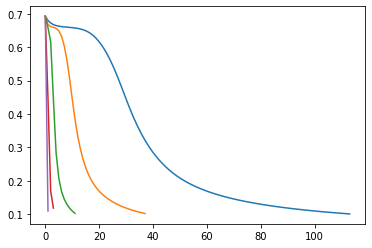

In [47]:
plt.plot(LR_costs[0])
plt.plot(LR_costs[1])
plt.plot(LR_costs[2])
plt.plot(LR_costs[3])
plt.plot(LR_costs[4])
plt.plot(LR_costs[5])
plt.plot(LR_costs[6])

In [54]:
params01, costs01, times01, itrs01 = eps_01

params05, costs05, times05, itrs05 = eps_05

params1, costs1, times1, itrs01 = eps_1

In [61]:
def PLOT_diflr(costs,LR, strl, eps):

    plt.figure(figsize=(12, 6),dpi=250)
    plt.rcParams['font.sans-serif']=['SimHei'] 
    plt.rcParams['axes.unicode_minus']=False
    for i in range(len(costs)):
        plt.plot(np.linspace(0,len(costs[i])*1000,len(costs[i])),costs[i],label='学习率:{}'.format(LR[i]))
#         plt.scatter(np.linspace(0,len(costs[i])*1000,len(costs01[i])),costs[i])

    plt.legend(loc='upper right')
    plt.title('LeakyReLU:$\epsilon$={}时，不同学习率成本曲线'.format(eps))
    plt.xlabel('迭代次数')
    plt.ylabel('成本')
    plt.savefig('{}.pdf'.format(strl))
#     plt.show()
    return True
# plt.plot(costs05)
# plt.plot(costs1)

True

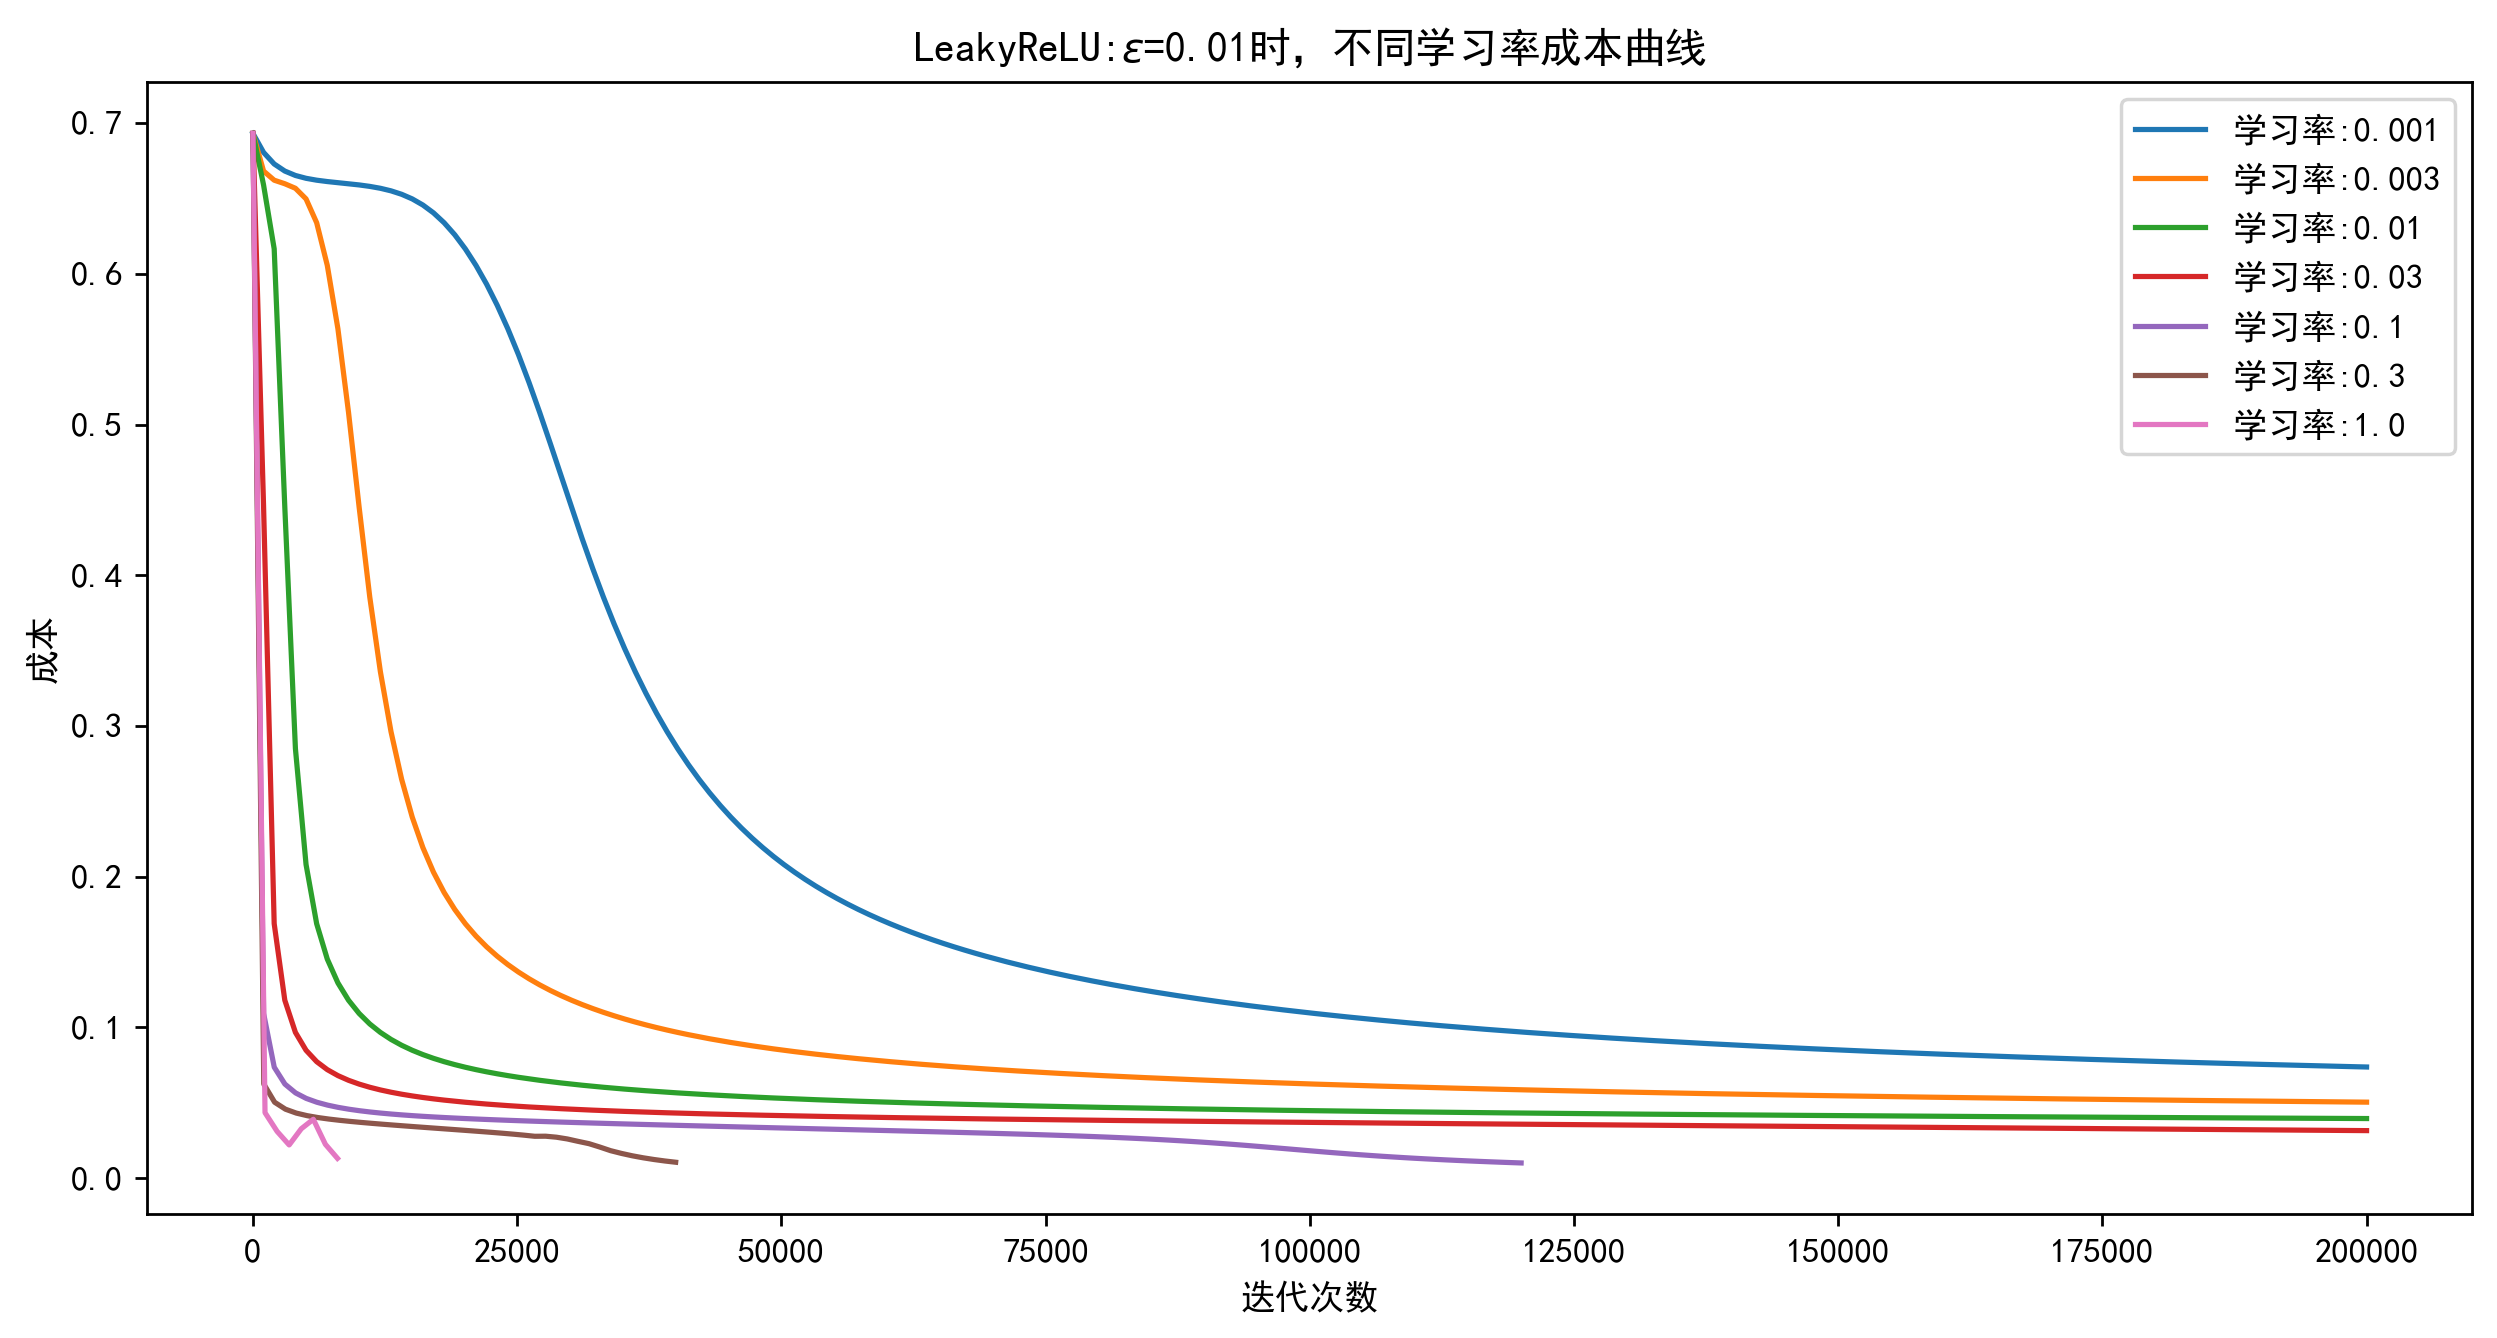

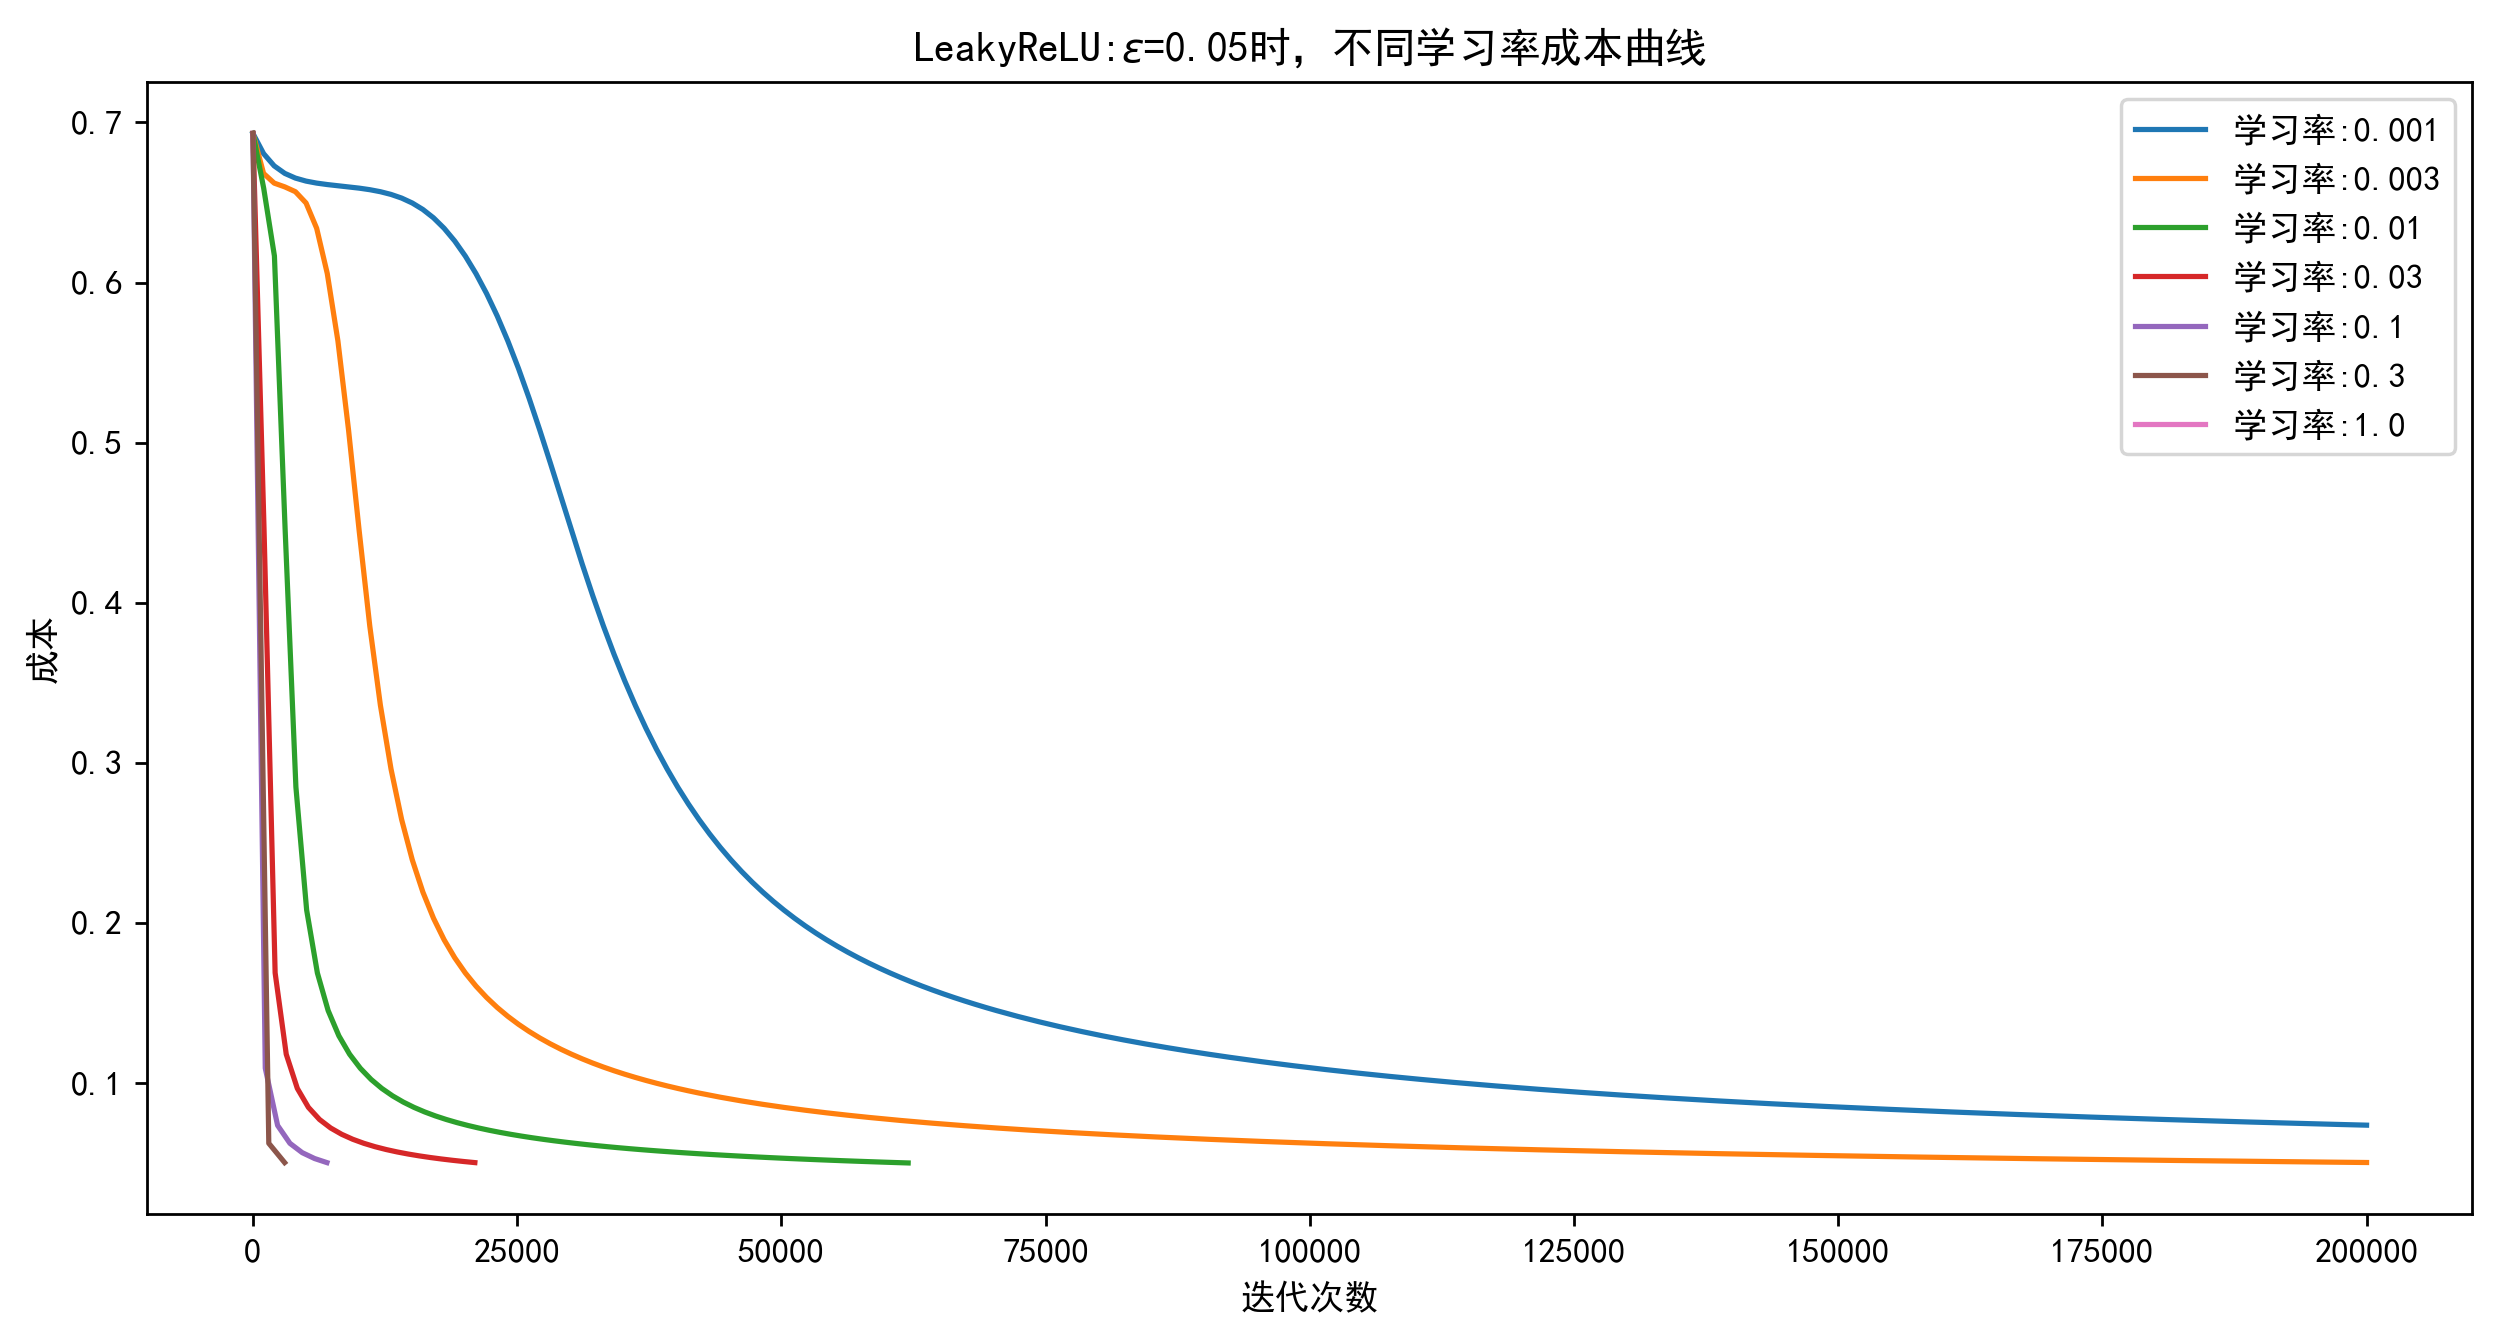

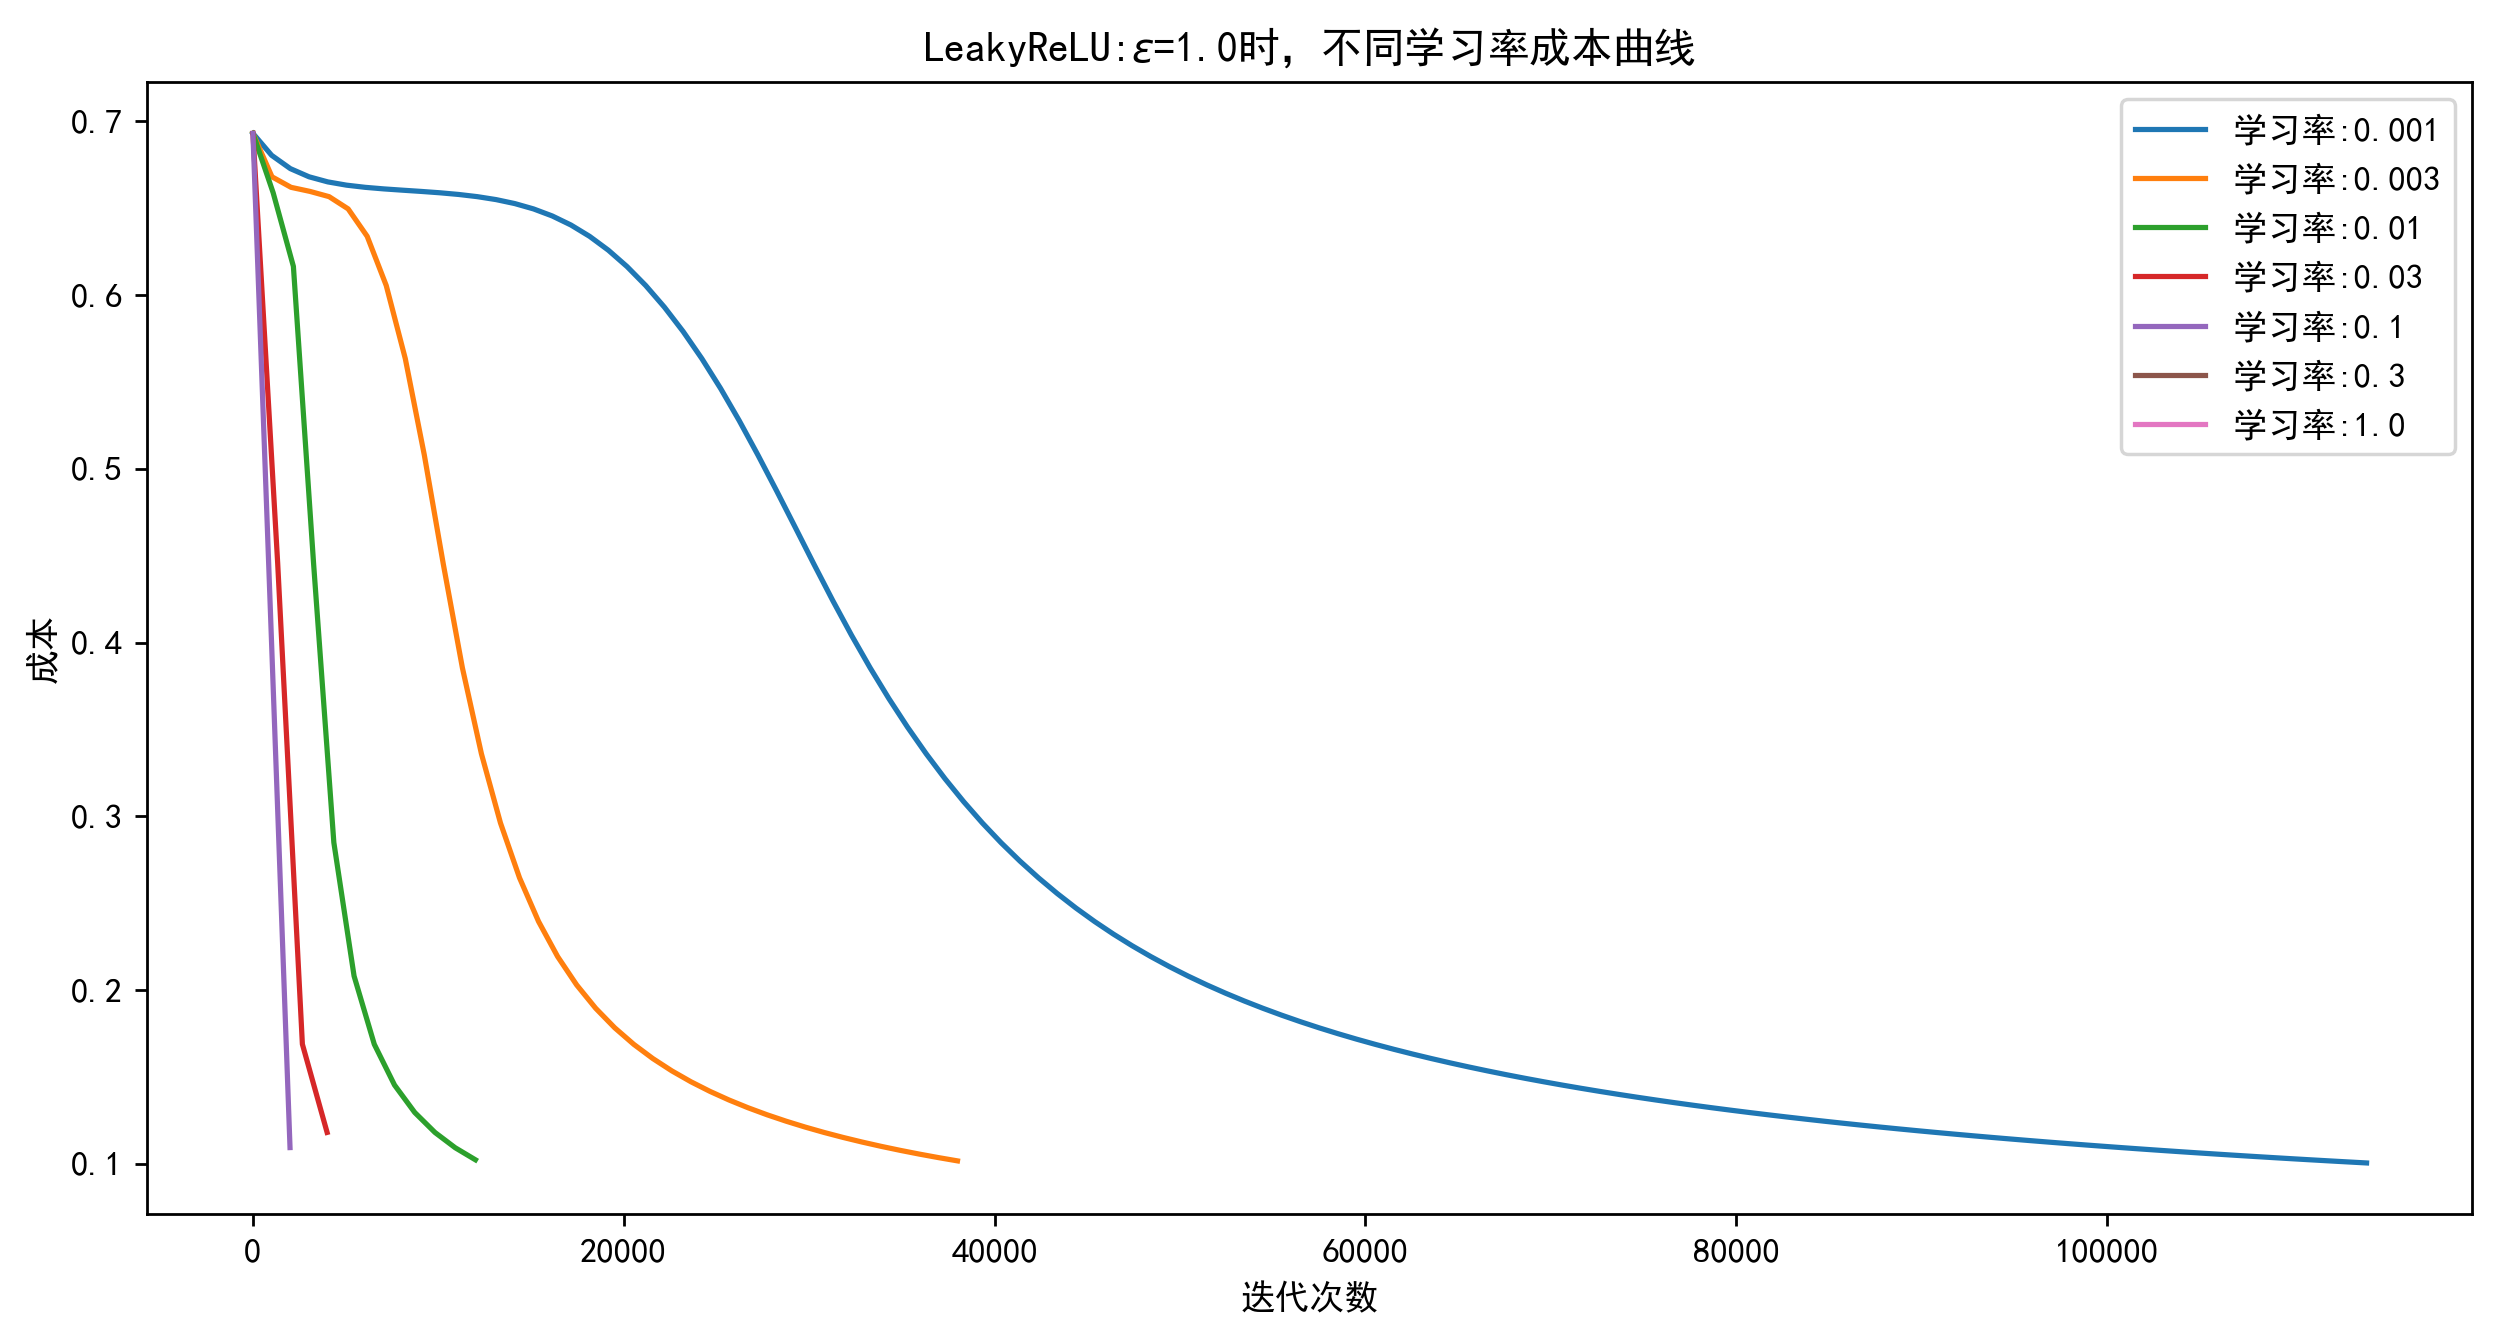

In [63]:
PLOT_diflr(costs01, lr, 'costs01', 0.01)

PLOT_diflr(costs05, lr, 'costs05', 0.05)

PLOT_diflr(costs1, lr, 'costs1', 1.0)

可以看出在测试的学习率中1.0的收敛速度最快

## 改变权值迭代方式

- 改变梯度下降参数更新方式能否提高运算速度？

常见的权值更新方法除了梯度下降法(GD)，还有

- 1.随机梯度下降(Stochastic Gradient Descent, SGD)法
- 2.批量梯度下降(Batch Gradient Descent，BGD)法
- 3.小批量梯度下降(Mini Batch Gradient Descent，MBGD)法
- 4.动量(Momentum)法（课程所用方法？，加一个动量项？）

=========================================================

- 5.Nesterov Momentum
- 6.AdaGrad
- 7.RMSProp
- 8.RMSProp with Nesterov Momentum
- 9.Adam

*.https://blog.csdn.net/u014595019/article/details/52989301

（拓展）机器学习中常见的几种最优化方法

- a.牛顿法和拟牛顿法（Newton's method & Quasi-Newton Methods）
- b.共轭梯度法（Conjugate Gradient）
- c.启发式优化方法
- d.解决约束优化问题——拉格朗日乘数法

*.https://blog.csdn.net/owen7500/article/details/51601627

### 随机梯度下降法


<img src="kiank_sgd.png" style="width:750px;height:250px;">

A stochastic approximation method

*.https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586

H. Robbins, S. Monro. The annals of mathematical statistics. JSTOR. 1951. 

Herbert Robbins was an American mathematician and statistician. Together with Sutton Monro, invented the stochastic gradient method, also known as the Robbins–Monro method.

*.http://fa.bianp.net/teaching/2018/COMP-652/


视频：

Youtube:*.https://www.youtube.com/watch?v=k3AiUhwHQ28 

Bilibili:*.https://www.bilibili.com/video/BV1V4411j7Zu?p=27


$\theta_i := \theta_i-\alpha\big (h_{\theta}(x^{(i)})-y^{(i)}\big )x^{(i)}$

随机梯度下降法和批量梯度下降法是两个极端，批量梯度下降每次采用所有数据下降，随机梯度下降每次用一个样本来梯度下降。

- 对于训练速度来说，随机梯度下降法由于每次仅仅采用一个样本来迭代，训练速度很快。

- 对于精准度来说，随机梯度下降法每次训练仅仅用一个样本决定梯度的方向，可能得到局部最小值，精准度不高。

- 对于收敛速度来说，由于随机梯度下降法一次迭代一个样本，导致迭代方向变化很大，不能很快的收敛到局部最优解。


=================== test one_demension forward_propagation ===================

In [51]:
n_x=30
n_y=1
parameters = initialize_parameters(n_x,60,n_y)

forward_propagation(train_set_X[:,48].reshape(-1,1), parameters)

(array([[0.50368602]]),
 {'Z1': array([[-0.03236627],
         [ 0.0111561 ],
         [-0.01046629],
         [-0.00609061],
         [ 0.01744265],
         [ 0.01984652],
         [ 0.01492683],
         [-0.00790761],
         [-0.02043046],
         [-0.0217526 ],
         [ 0.00495591],
         [ 0.02664421],
         [ 0.00365409],
         [ 0.02734358],
         [-0.00850114],
         [-0.0111365 ],
         [-0.02098409],
         [-0.03221447],
         [-0.0201347 ],
         [ 0.00283354],
         [-0.00438428],
         [-0.00548665],
         [-0.00306722],
         [-0.01331034],
         [-0.01461496],
         [ 0.00394669],
         [-0.02259701],
         [ 0.00573004],
         [-0.00047751],
         [ 0.00810544],
         [-0.01506662],
         [-0.0087322 ],
         [ 0.00242682],
         [ 0.00690674],
         [ 0.00435472],
         [-0.00422122],
         [ 0.00312669],
         [ 0.00400743],
         [-0.00532107],
         [-0.00923849],
         [

#### SGD主函数

##### With replacement （有放回的）

In [41]:
def nn_model_SGD_withR(X,Y,n_h, eps = 0.01, l=0.5, epoch=30):
    """
    参数：
        X - 数据集,维度为（30，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    seed = 0
    np.random.seed(0) #指定随机种子
    lenm = X.shape[1]
#     print(lenm)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
#     print('n_x:{}, n_y:{}'.format(n_x, n_y))
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
#     print('W1.shape:{}'.format(W1.shape))
    b1 = parameters["b1"]
#     print('b1.shape:{}'.format(b1.shape))
    W2 = parameters["W2"]
#     print('W2.shape:{}'.format(W2.shape))
    b2 = parameters["b2"]
#     print('b2.shape:{}'.format(b2.shape))
    
    costs=[]
    epoch = epoch#int(num_iterations/lenm)
    for j in range(epoch):
        seed += 1 
        idx = np.random.randint(0,lenm,lenm)## with repalcement
        for i in idx:
            one_X = X[:,i].reshape(-1,1)
            one_Y = Y[:,i].reshape(-1,1)
            A2 , cache = forward_propagation(one_X,parameters)
            cost = compute_cost(A2,one_Y,parameters)
            grads = backward_propagation(parameters,cache,one_X,one_Y)
            parameters = update_parameters(parameters,grads,learning_rate=l)

            if cost < eps: 
                print('{} epoch，第{}次循环，成本为：{},递归结束！'.format(j,i,str(cost)))
                costs.append(cost)
                break
        
    return parameters, costs

=================== test nn_model_SGD_withR ===================

In [154]:
parameters_SGD_R, costs_SGD_R = nn_model_SGD_withR(train_set_X, train_set_Y, n_h=60, eps=0.01, l=0.5)

0 epoch，第7次循环，成本为：0.0052838523238831064,递归结束！
1 epoch，第7次循环，成本为：0.001132404991487684,递归结束！
2 epoch，第294次循环，成本为：0.004546674594348867,递归结束！
3 epoch，第104次循环，成本为：0.004626988364031826,递归结束！
4 epoch，第361次循环，成本为：0.005275291617316727,递归结束！
5 epoch，第283次循环，成本为：0.0070059551744596745,递归结束！
6 epoch，第241次循环，成本为：0.00772581989677573,递归结束！
7 epoch，第222次循环，成本为：0.004976544708790258,递归结束！
8 epoch，第393次循环，成本为：0.00665671604091303,递归结束！
9 epoch，第222次循环，成本为：0.006183283888560338,递归结束！
10 epoch，第393次循环，成本为：0.006283342923124395,递归结束！
11 epoch，第89次循环，成本为：0.005619341958082516,递归结束！
12 epoch，第104次循环，成本为：0.0007517765885715406,递归结束！
13 epoch，第8次循环，成本为：0.007541430352890417,递归结束！
14 epoch，第379次循环，成本为：0.0068557914598824776,递归结束！
15 epoch，第233次循环，成本为：0.007750167411441808,递归结束！
16 epoch，第122次循环，成本为：0.00523419710259649,递归结束！
17 epoch，第247次循环，成本为：0.006436814880191107,递归结束！
18 epoch，第434次循环，成本为：0.006783228171352575,递归结束！
19 epoch，第371次循环，成本为：0.007704897704182929,递归结束！
20 epoch，第185次循环，成本为：0.009792913329754604,递归结束！
21 epoch

In [155]:
predictions_train_SGD_R = predict(parameters_SGD_R, train_set_X)
print ('训练集准确率: %d' % float((np.dot(np.squeeze(train_set_Y), predictions_train_SGD_R.T) + np.dot(1 - np.squeeze(train_set_Y), 1 - predictions_train_SGD_R.T)) / float(train_set_Y.size) * 100) + '%')

predictions_test_SGD_R = predict(parameters_SGD_R, test_set_X)
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), predictions_test_SGD_R.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - predictions_test_SGD_R.T)) / float(test_set_Y.size) * 100) + '%')

训练集准确率: 94%
测试集准确率: 92%


##### Without replacement (无放回的）

现实世界人们采用的，通过预先的shuffle将样本重新随机排序然后进行训练

In [42]:
import random

In [43]:
random.sample(range(0, 10), 10), np.random.permutation(10)

([4, 6, 2, 1, 8, 9, 7, 5, 3, 0], array([2, 9, 6, 4, 0, 3, 1, 7, 8, 5]))

In [44]:
def nn_model_SGD_withOR(X,Y,n_h, eps = 0.01, l=0.5, epoch=30):
    """
    参数：
        X - 数据集,维度为（30，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值

    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    seed = 0
    np.random.seed(seed) #指定随机种子
    lenm = X.shape[1]
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
#     print('W1.shape:{}'.format(W1.shape))
    b1 = parameters["b1"]
#     print('b1.shape:{}'.format(b1.shape))
    W2 = parameters["W2"]
#     print('W2.shape:{}'.format(W2.shape))
    b2 = parameters["b2"]
#     print('b2.shape:{}'.format(b2.shape))
    
    costs=[]
    epoch = epoch
    for j in range(epoch):
        seed += 1 
        idx = np.arange(lenm)
        random.shuffle(idx)  ## without repalcement
        for i in idx:
#             idx = random.sample(range(1, lenm), 1)
            one_X = X[:,i].reshape(-1,1)
            one_Y = Y[:,i].reshape(-1,1)
            A2 , cache = forward_propagation(one_X,parameters)
            cost = compute_cost(A2,one_Y,parameters)
            grads = backward_propagation(parameters,cache,one_X,one_Y)
            parameters = update_parameters(parameters,grads,learning_rate=l)

            if cost < eps: 
                print('{} epoch，第{}次循环，成本为：{},递归结束！'.format(j,i,str(cost)))
                costs.append(cost)
                break
            
    return parameters, costs

=================== test nn_model_SGD_withOR ===================

In [95]:
parameters_SGD_OR, costs_SGD_OR = nn_model_SGD_withOR(train_set_X, train_set_Y, n_h=60, eps=0.01, l=0.5)

0 epoch，第7次循环，成本为：0.0024819482645914944,递归结束！
1 epoch，第303次循环，成本为：0.008550233103203908,递归结束！
2 epoch，第294次循环，成本为：0.008370438509708044,递归结束！
3 epoch，第427次循环，成本为：0.004901815305825037,递归结束！
4 epoch，第427次循环，成本为：0.004002074255611945,递归结束！
5 epoch，第114次循环，成本为：0.009043642345798363,递归结束！
6 epoch，第96次循环，成本为：0.00755423675315499,递归结束！
7 epoch，第380次循环，成本为：0.008224101269062145,递归结束！
8 epoch，第283次循环，成本为：0.007286852147632461,递归结束！
9 epoch，第303次循环，成本为：0.004668224201692199,递归结束！
10 epoch，第419次循环，成本为：0.005863039937709738,递归结束！
11 epoch，第54次循环，成本为：0.002240051777239832,递归结束！
12 epoch，第89次循环，成本为：0.008725828354937716,递归结束！
13 epoch，第335次循环，成本为：0.005944405591612233,递归结束！
14 epoch，第74次循环，成本为：0.002161364895674119,递归结束！
15 epoch，第2次循环，成本为：0.005981146101834952,递归结束！
16 epoch，第419次循环，成本为：0.00353652983310456,递归结束！
17 epoch，第138次循环，成本为：0.0043649435669701805,递归结束！
18 epoch，第89次循环，成本为：0.009643344586134386,递归结束！
19 epoch，第54次循环，成本为：0.0040181511853193885,递归结束！
20 epoch，第28次循环，成本为：0.008472435922340378,递归结束！
21 epoch，第37

In [96]:
predictions_train_SGD_OR = predict(parameters_SGD_OR, train_set_X)
print ('训练集准确率: %d' % float((np.dot(np.squeeze(train_set_Y), predictions_train_SGD_OR.T) + np.dot(1 - np.squeeze(train_set_Y), 1 - predictions_train_SGD_OR.T)) / float(train_set_Y.size) * 100) + '%')

predictions_test_SGD_OR = predict(parameters_SGD_OR, test_set_X)
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), predictions_test_SGD_OR.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - predictions_test_SGD_OR.T)) / float(test_set_Y.size) * 100) + '%')

训练集准确率: 96%
测试集准确率: 93%


使用第一种方法会破坏CPU/GPU的性能，如果数据量过大也会造成内存不匹配。

#### 调用SGDClassifier包实现随机梯度下降

*.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [53]:
from sklearn.linear_model import SGDClassifier
##set random seed

np.random.seed(20)
SGD_ = SGDClassifier()
SGD_.fit(train_set_X.T, train_set_Y.T)
SGD_pred = SGD_.predict(test_set_X.T)

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [55]:
?SGDClassifier

In [54]:
?SGD_.fit

In [123]:
SGD_pred
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), SGD_pred.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - SGD_pred.T)) / float(SGD_pred.size) * 100) + '%')

测试集准确率: 97%


### 批量梯度下降法

将$J(\theta)$对$\theta$求偏导，得到每个$\theta$对应的的梯度：

$\theta_0 := \theta_0-\alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})$

$\theta_1 := \theta_1-\alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\ast x^{(i)})$

在梯度下降的每一步中，我们都用到了所有的训练样本，我们需要进行求和运算，在梯度下降中，在计算微积分时，每一个样本都需要计算，会导致运算速度比较慢。

### 小批量梯度下降法

<img src="kiank_minibatch.png" style="width:750px;height:250px;">

$\theta_1 := \theta_1-\alpha\frac{1}{t}\sum\limits_{i=1}^{t}x((h_{\theta}(x^{(i)})-y^{(i)})\ast x^{(i)})$

每次迭代使用一个以上又不是全部的样本

MBGD 是集中了SGD和BGD的优点。使用多个样本相比SGD提高了梯度估计的精准度，小批量的估计。

缺点是同SGD一样，每次梯度的方向不确定，可能需要很长时间接近最小值点，不会收敛通常在使用MBGD之前先将数据随机打乱，然后划分Mini-batch，所以MBGD有时也称SGD。

考虑到计算机的计算方式，Mini-batch 大小的选择通常使用2的幂数，一般取64~512（64,128,256,512），1024也有用到但是情况很少，可以获得更少的运行时间。

遍历完所有的数据称为一个epoch，通常需要遍历几次epoch才行

*.https://zhuanlan.zhihu.com/p/90104030?from_voters_page=true
*.https://mooc.study.163.com/learn/2001281003?tid=2403023002&_trace_c_p_k2_=e4d07c7c121442469a0f7078721756cb#/learn/content?type=detail&id=2403362457

#### 生成Mini batches

In [45]:
def create_MiniBatch(X,Y,mini_batch_size=64,seed=0):
    '''
    输入：X的维度是（n,m），m是样本数，n是每个样本的特征数
    '''
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []
    #step1：打乱训练集
    #生成0~m-1随机顺序的值，作为我们的下标
    permutation = list(np.random.permutation(m))
    #得到打乱后的训练集
    shuffled_X = X[:,permutation]
    shuffled_Y = Y[:,permutation].reshape((1,m))
    #step2：按照batchsize分割训练集
    #得到总的子集数目，向下取整
    num_complete_minibatches = m // mini_batch_size #int(m / mini_batch_size)
    for k in range(0,num_complete_minibatches):
        #冒号：表示取所有行，第二个参数a：b表示取第a列到b-1列，不包括b
        mini_batch_X = shuffled_X[:, k * mini_batch_size:(k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size:(k+1) * mini_batch_size]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    #m%mini_batch_size != 0表示还有剩余的不够一个batch大小，把剩下的作为一个batch
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,mini_batch_size * num_complete_minibatches:]
        mini_batch_Y = shuffled_Y[:,mini_batch_size * num_complete_minibatches:]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

==================== test creat_MiniBatch ====================

In [52]:
mini_batches = create_MiniBatch(train_set_X, train_set_Y)
print('mini_batches: {}个，最后一个mini_batch有{}个样本。'.format(len(mini_batches),mini_batches[-1][0].shape[1]))

mini_batches: 8个，最后一个mini_batch有7个样本。


#### MiniBatch主函数

In [46]:
def MiniBatch_SGD(X,Y,n_h,print_cost=False,mini_batch_size=64, eps = 0.01, l=0.5, epoch=200000):
    """
    参数：
        X - 数据集,维度为（30，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值
8
    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    seed = 0
    np.random.seed(seed) #指定随机种子
    lenm = X.shape[1]
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
#     print('W1.shape:{}'.format(W1.shape))
    b1 = parameters["b1"]
#     print('b1.shape:{}'.format(b1.shape))
    W2 = parameters["W2"]
#     print('W2.shape:{}'.format(W2.shape))
    b2 = parameters["b2"]
#     print('b2.shape:{}'.format(b2.shape))
    
    costs=[]
    epoch = epoch
    for j in range(epoch):
        seed += 1
        minibatches = create_MiniBatch(X, Y, mini_batch_size=mini_batch_size,seed=seed)
        for minibatch in minibatches:
            minibatch_X, minibatch_Y = minibatch
#             print('minibatch_X.shape: {}, minibatch_Y.shape: {}'.format(mini_batches_X.shape, mini_batches_Y.shape))
#             input()
            A2 , cache = forward_propagation(minibatch_X,parameters)
            cost = compute_cost(A2,minibatch_Y,parameters)
            grads = backward_propagation(parameters,cache,minibatch_X,minibatch_Y)
            parameters = update_parameters(parameters,grads,learning_rate=l)
                            
        if print_cost:
            if j%10 == 0:
                print('{} epoch，成本为：{}'.format(j,str(cost)))
                costs.append(cost)
                
        if cost < eps: 
                print('{} epoch，成本为：{},递归结束！'.format(j,str(cost)))
                costs.append(cost)
                break
            
    return parameters, costs

In [55]:
parameters_MBSGD, costs_MBSGD = MiniBatch_SGD(train_set_X, train_set_Y,n_h=60,print_cost=True,mini_batch_size=64, eps = 0.01, l=0.5, epoch=200000)

0 epoch，成本为：0.1747108822346474
10 epoch，成本为：0.7332687853539654
20 epoch，成本为：0.4702323570507879
30 epoch，成本为：0.14470823614169365
40 epoch，成本为：0.04183432237659891
50 epoch，成本为：0.2624056419938831
60 epoch，成本为：0.1167716455073012
70 epoch，成本为：0.1416858306918644
80 epoch，成本为：0.2527790867230019
90 epoch，成本为：0.08189076369213276
100 epoch，成本为：0.09603509632305686
109 epoch，成本为：0.0032828803623499367,递归结束！


In [151]:
predictions_train_MBSGD = predict(parameters_MBSGD, train_set_X)
print ('训练集准确率: %d' % float((np.dot(np.squeeze(train_set_Y), predictions_train_MBSGD.T) + np.dot(1 - np.squeeze(train_set_Y), 1 - predictions_train_MBSGD.T)) / float(train_set_Y.size) * 100) + '%')

predictions_test_MBSGD = predict(parameters_MBSGD, test_set_X)
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), predictions_test_MBSGD.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - predictions_test_MBSGD.T)) / float(test_set_Y.size) * 100) + '%')

训练集准确率: 95%
测试集准确率: 94%


#### Mini BGD拓展

分析：SGD在收敛速度上会比GD快很多，但是由于训练过程中每次随机选取一个样本进行训练，可能会由于“信息量”的不够而导致准确率的下降，但这种损失是可以接受的，因为本次课程作业中的GD例子也有可能存在过拟合的情况。

SGD在样本训练迭代过程中会有噪音，梯度会朝着最小值移动，但是不会精确地收敛，所以算法最后在最小值附近摆动，并不会真正的收敛，因为用的学习率$\eta$是固定值；但是如果我们随着迭代的进行慢慢降低学习率$\eta$的话，在初期学习率还比较大，学习速率较快，但随着$\eta$变小，学习速率也变慢变小，所以最后的曲线会在最小值附近的一小块区域里摆动。



学习率衰减（Learning rate decay）

*.https://mooc.study.163.com/learn/2001281003?tid=2403023002#/learn/content?type=detail&id=2403362465

###方法1：

$\eta=\frac{1}{1+\text{DecayRate}*\text{EpochNum}}\eta_0$
- DecayRate: 衰减率
- EpochNum: 代数
- $\eta_0$: 初始学习率

<img style="float: right;" src="SGDill.jpg" width="40%">
###方法2：指数衰减

$\eta=C^{\text{EpochNum}}\eta_0$

- C：小于1的常数，如0.95

###方法3：

$\eta=\frac{k}{\sqrt{\text{EpochNum}}}\eta_0$

- $k:$ 某常数

###方法4：

$\eta=\frac{k}{\sqrt{t}}\alpha$

- $t:$ Mini-batch的大小

###方法5：使用离散学习率

###方法6：手动衰减；如果一次只训练一个模型，如果花上数小时或数天来训练，看看自己的模型训练，耗上数日，学习速率变慢了，然后把\alpha调小一点。

但这种方法只是在模型数量小的时候有用。

### 动量梯度下降法 Gradient descent with momentum

<img src="Momentum.png" width='60%'>

SGD+Momentum:*.https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/

<img style="float: center;" src="GDwithMomentum.png" >

<img style="float: center;" src="GDWM.png" width="50%">

- 目标：减少上下震荡，加快水平方向的下降速度

动量项：$\nu_{dW}=0, \nu_{db}=0$

对迭代次数t,
计算当前mini batch的$dW,db$,并按照以下方式更新动量项和权值参数：$$\begin{cases}\nu_{dW}=\beta\nu_{dW}+(1-\beta)dW\\\nu_{db}=\beta\nu_{db}+(1-\beta)db\end{cases}$$

$$\begin{cases}W=W-\alpha dW\\ b=b-\alpha db\end{cases}$$

*.https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d

#### 初始化动量项

In [47]:
def initialize_velocity(parameters):
    """
    将动量初始化为python字典:
        - keys: "dW1", "db1", ..., "dWL", "dbL" 
        - values: 与相应的梯度或参数具有相同形状的全零的numpy array.
    输入:
    parameters -- 包含参数的字典.
        parameters['W' + str(l)] = Wl
        parameters['b' + str(l)] = bl
    
    返回:
    v -- 包含当前动量项的字典.
        v['dW' + str(l)] = velocity of dWl
        v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # 初始化动量
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters['W' + str(l+1)].shape))
        v["db" + str(l+1)] = np.zeros((parameters['b' + str(l+1)].shape))
        
    return v

In [76]:
print('===== test initialize_velocity =====')
parameters , cache , X_assess , Y_assess = backward_propagation_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

===== test initialize_velocity =====
v["dW1"] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
v["db1"] = [[0.]
 [0.]
 [0.]
 [0.]]
v["dW2"] = [[0. 0. 0. 0.]]
v["db2"] = [[0.]]


#### 用动量项更新参数

In [48]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    使用动量更新参数
    
    输入:
    parameters -- 包含参数的字典:
        parameters['W' + str(l)] = Wl
        parameters['b' + str(l)] = bl
    grads -- 包含梯度的字典:
        grads['dW' + str(l)] = dWl
        grads['db' + str(l)] = dbl
    v -- 包含动量项的字典:
        v['dW' + str(l)] = ...
        v['db' + str(l)] = ...
    beta -- 动量超参数，标量
    learning_rate -- 学习率，标量
    
    返回:
    parameters -- 更新后的参数字典
    v -- 更新后的动量项字典
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        # compute velocities
        v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1-beta) * grads['dW'+ str(l+1)]
        v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1-beta) * grads['db'+ str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] -= learning_rate * v["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * v["db" + str(l+1)]
        
    return parameters, v

In [78]:
print('===== test initialize_velocity =====')
parameters, v = update_parameters_with_momentum(parameters, grads, v, 0.9, 0.5)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

===== test initialize_velocity =====
W1 = [[-0.00416571 -0.00056399]
 [-0.02134783  0.01639769]
 [-0.01793766 -0.00841425]
 [ 0.00504186 -0.01245374]]
b1 = [[ 1.93043317e-06]
 [ 1.46868869e-05]
 [-3.23724306e-06]
 [ 1.50281768e-05]]
W2 = [[-0.01076133 -0.01066688  0.00493308  0.02358124]]
b2 = [[-0.00329474]]
v["dW1"] = [[-3.74529271e-06  2.64175415e-06]
 [-2.82692879e-05  1.00471501e-05]
 [ 6.60485782e-06 -6.44243506e-06]
 [-2.61091587e-05  1.71173731e-06]]
v["db1"] = [[-3.86086634e-06]
 [-2.93737738e-05]
 [ 6.47448613e-06]
 [-3.00563536e-05]]
v["dW2"] = [[ 0.00036361  0.0031536   0.00116291 -0.00131832]]
v["db2"] = [[0.00658949]]


#### 动量梯度下降主函数

In [49]:
def MiniBatch_SGD_withMomentum(X,Y,n_h,print_cost=False,mini_batch_size=64, eps = 0.01, l=0.5, beta = 0.9, epoch=200000):
    """
    参数：
        X - 数据集,维度为（30，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值
8
    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
    """
    seed = 0
    np.random.seed(seed) #指定随机种子
    lenm = X.shape[1]
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
#     print('W1.shape:{}'.format(W1.shape))
    b1 = parameters["b1"]
#     print('b1.shape:{}'.format(b1.shape))
    W2 = parameters["W2"]
#     print('W2.shape:{}'.format(W2.shape))
    b2 = parameters["b2"]
#     print('b2.shape:{}'.format(b2.shape))
    
    costs=[]
    epoch = epoch
    for j in range(epoch):
        seed += 1
        minibatches = create_MiniBatch(X, Y, mini_batch_size=mini_batch_size,seed=seed)
        for minibatch in minibatches:
            minibatch_X, minibatch_Y = minibatch
#             print('minibatch_X.shape: {}, minibatch_Y.shape: {}'.format(mini_batches_X.shape, mini_batches_Y.shape))
#             input()
            A2 , cache = forward_propagation(minibatch_X,parameters)
            cost = compute_cost(A2,minibatch_Y,parameters)
            grads = backward_propagation(parameters,cache,minibatch_X,minibatch_Y)
            v = initialize_velocity(parameters)
            parameters, v = update_parameters_with_momentum(parameters,grads,v=v,beta=beta,learning_rate=l)
                            
        if print_cost:
            if j%10 == 0:
                print('{} epoch，成本为：{}'.format(j,str(cost)))
                costs.append(cost)
                
        if cost < eps: 
                print('{} epoch，成本为：{},递归结束！'.format(j,str(cost)))
                costs.append(cost)
                break
            
    return parameters, costs

In [54]:
parameters_SGDWM, costs_SGDWM = MiniBatch_SGD_withMomentum(train_set_X, train_set_Y, n_h=60, print_cost=True, mini_batch_size=64, eps = 0.01, l=0.5, beta = 0.9, epoch=200000)

0 epoch，成本为：0.5068850487370743
10 epoch，成本为：0.7680817553854649
20 epoch，成本为：0.5485986919553133
30 epoch，成本为：0.6142055727348558
40 epoch，成本为：0.8580470843415856
50 epoch，成本为：0.7665852946307906
60 epoch，成本为：0.8131090917761392
70 epoch，成本为：0.688318901068896
80 epoch，成本为：0.6897316370567607
90 epoch，成本为：0.616810394600502
100 epoch，成本为：0.5484999552004831
110 epoch，成本为：0.6134042598265076
120 epoch，成本为：0.6023714318480108
130 epoch，成本为：0.6692586283348742
140 epoch，成本为：0.749713099249692
150 epoch，成本为：0.6476430722355798
160 epoch，成本为：0.6456760058225434
170 epoch，成本为：0.5020528279521878
180 epoch，成本为：0.7155342278996563
190 epoch，成本为：0.5222428758977757
200 epoch，成本为：0.5078626001887373
210 epoch，成本为：0.658377146735314
220 epoch，成本为：0.4842567981418239
230 epoch，成本为：0.45060130592071673
240 epoch，成本为：0.28999635291816556
250 epoch，成本为：0.3809473832255526
260 epoch，成本为：0.43712494914312605
270 epoch，成本为：0.24716896130521304
280 epoch，成本为：0.43577845701044504
290 epoch，成本为：0.4840847191090992
300 epoch，成本为：0.2914

In [55]:
predictions_train_SGDWM = predict(parameters_SGDWM, train_set_X)
print ('训练集准确率: %d' % float((np.dot(np.squeeze(train_set_Y), predictions_train_SGDWM.T) + np.dot(1 - np.squeeze(train_set_Y), 1 - predictions_train_SGDWM.T)) / float(train_set_Y.size) * 100) + '%')

predictions_test_SGDWM = predict(parameters_SGDWM, test_set_X)
print ('测试集准确率: %d' % float((np.dot(np.squeeze(test_set_Y), predictions_test_SGDWM.T) + np.dot(1 - np.squeeze(test_set_Y), 1 - predictions_test_SGDWM.T)) / float(test_set_Y.size) * 100) + '%')

训练集准确率: 97%
测试集准确率: 96%


<img src="opt1.gif">
<img src="opt2.gif">

- 过拟合处理

- 如果我们改变数据集呢?

应用难点分析：

- 网络结构的确定: 网络结构改变即需要重新计算
- 激活函数的选取
- 网络参数的设置
- 初始权值的设置
- 学习子样的排列次序
- 学习误差的控制: 样本数据客观存在的精度

# 结论与展望